# Hack The Feed: Insights From Social Media Data

## By Nwani Ugonna Stanley

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the data
facebook = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv", low_memory=False)
linkedin = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv", low_memory=False)
twitter = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv", low_memory=False)
instagram = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv", low_memory=False)

In [3]:
# show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Facebook

In [4]:
facebook.shape  # How many posts and features are in the data

(9803, 147)

In [5]:
facebook_columns = facebook.columns  # save column list

In [6]:
facebook_dropped_cols = []

# drop columns that are empty
for column in facebook_columns:
    if facebook[column].isna().sum() == facebook.shape[0]:  # if all the rows are empty
        facebook_dropped_cols.append(column)
        facebook.drop(columns=column, inplace=True)

In [7]:
facebook.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Post Video Play Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Video Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Tags
0,12/17/2022 5:08 pm,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",https://www.facebook.com/StanbicIBTC/videos/53...,"207,378","207,378",5,"207,373",0.0,"1,147","1,147",0.0,"206,231","206,231",0.0,"207,378","207,378",4,"213,627",0.0,"1,112",0.0,0.49%,0.49%,"1,024",179,176,3.0,0.0,0.0,0.0,0.0,59,2.0,0%,NaN,784,784,NaN,52,0.0,13.0,792,51,231,177,53.0,2.0,0.0,587,NaN,NaN,50.0,577,13.0,982,982,0.0,917,917,0.0,65,65,0.0,960,22.0,634,348,270,270,0.0,261,9.0,186,84,897,0.0,63,2.0,19,19,0.0,84.07,3.47,"14,824.6","14,824.6",0,975,975,0.0,263,62,19,0.0,CIB Posts
1,5/4/2019 10:01 am,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,https://www.facebook.com/StanbicIBTC/photos/a....,"125,784","125,784","23,926","101,858",0.0,"103,287","103,287",0.0,"22,497","22,497",0.0,"92,009","92,009","17,238","76,074",0.0,"76,764",0.0,4.67%,6.39%,"5,876",762,747,10.0,1.0,4.0,0.0,0.0,572,47.0,0%,NaN,"4,495","4,495","1,089",NaN,0.0,10.0,"4,010","3,360","1,166",762,413.0,47.0,0.0,"3,412",NaN,931,NaN,"2,896",10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/2/2020 9:00 pm,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,https://www.facebook.com/StanbicIBTC/photos/a....,"89,699","89,699","9,319","80,380",0.0,"79,873","79,873",0.0,"9,826","9,826",0.0,"84,347","84,347","8,910","75,068",0.0,"74,322",0.0,5.29%,5.62%,"4,744",465,458,6.0,0.0,0.0,0.0,1.0,855,29.0,0%,NaN,"3,395","3,395",738,NaN,0.0,5.0,"2,328","2,033",834,446,423.0,28.0,0.0,"1,948",NaN,713,NaN,"1,470",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleaning

In [8]:
# drop rows that do not have engagements (the target feature)
facebook.dropna(subset=['Engagements'], inplace=True)

**Convert the date column to datetime datatype.**

In [9]:
am_pm = facebook['Date'].str.contains('am')

In [10]:
date_hold = pd.to_datetime(facebook['Date'].str.upper(), format="%m/%d/%Y %H:%M %p")

In [11]:
for idx, am in enumerate(am_pm):
    if not am and date_hold[idx].hour != 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)
    if am and date_hold[idx].hour == 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)

In [12]:
facebook['Date'] = date_hold  # re-assign the date column to the formatted date we created

In [13]:
# Turn all numerical values columns to float to take care of NaNs that are making columns object datatype
for col in facebook.columns:
    if col == "Post ID":
        continue
    try:
        facebook[col] = facebook[col].str.replace(",", "")
        facebook[col] = facebook[col].astype("float")
    except:
        continue

In [14]:
# Divide the dataset into the four content types. Makes it easier to deal with
facebook_photo = facebook[facebook['Content Type'] == 'Photo']
facebook_video = facebook[facebook['Content Type'] == 'Video']
facebook_text = facebook[facebook['Content Type'] == 'Text']
facebook_link = facebook[facebook['Content Type'] == 'Link']

In [ ]:
facebook.to_csv("Facebook_cleaned.csv", index=False)

## Exploratory Data Analysis

In [15]:
# set color for all visualizations
base_color = sns.color_palette()[9]

In [16]:
# create a function to create plots
def plot(x_axis, y_axis, data, title, xlabel, ylabel, order=None, color=base_color, figsize=(20, 6), type='bar'):
    # choose the figure size of the plot
    plt.figure(figsize=figsize)

    # plot chart to display the information
    if type == 'bar':
        sns.barplot(x=x_axis, y=y_axis, data=data, order=order, color=color);
    elif type == 'line':
        sns.lineplot(x=x_axis, y=y_axis, data=data);
    elif type == 'scatter':
        sns.scatterplot(x=x_axis, y=y_axis, data=data);

    # necessary labels and title
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    
    plt.show()

### 1. What is the timeframe covered by the data?

In [17]:
facebook['Date'].min(), facebook['Date'].max()

(Timestamp('2013-11-26 20:16:00'), Timestamp('2023-07-13 10:08:00'))

The faceboook dataset covers approximately 10 years.

### 2. What posts had the highest engagements?

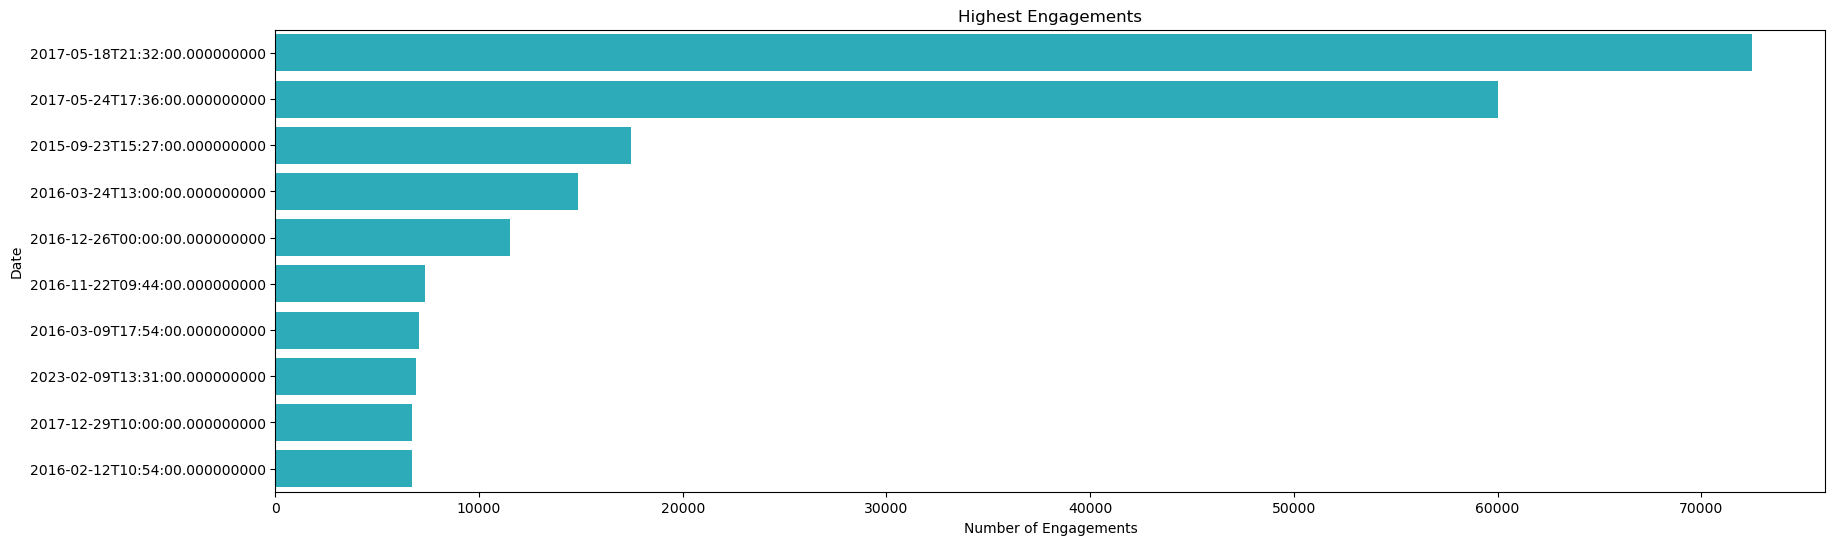

In [18]:
highest_engagements = facebook.sort_values(by='Engagements', ascending=False).head(10)
plot('Engagements', 'Date', highest_engagements, "Highest Engagements", "Number of Engagements", "Date", type='bar')

Most of the posts here are old (2015/2016/2017). The first two are significantly higher than the rest. There is a post that was made in 2023.

The first two posts were informational posts, both posts encouraging people to bank with Stanbic IBTC.

### 2.1. What posts had the highest impressions?

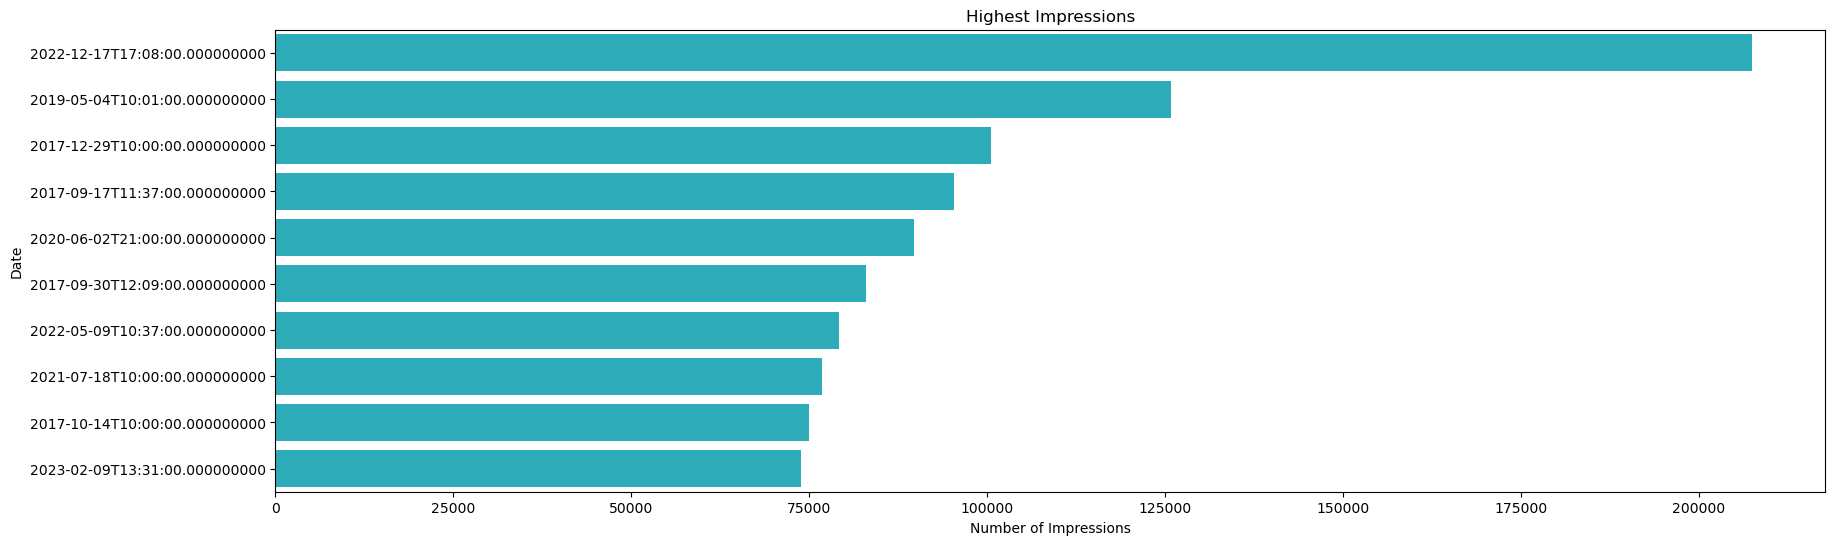

In [19]:
highest_impressions = facebook.sort_values(by='Impressions', ascending=False).head(10)
plot('Impressions', 'Date', highest_impressions, "Highest Impressions", "Number of Impressions", "Date", type='bar')

### 2.2. What posts had the highest reach?

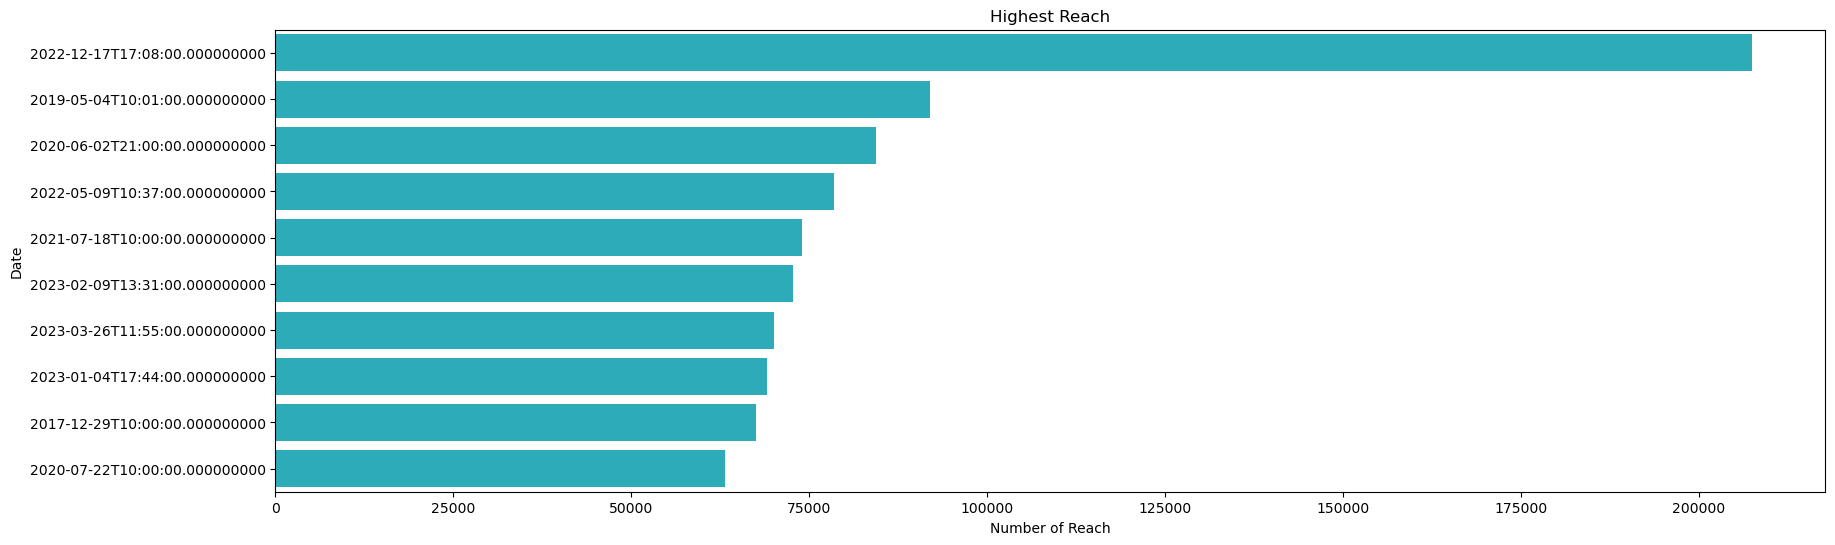

In [20]:
highest_reach = facebook.sort_values(by='Reach', ascending=False).head(10)
plot('Reach', 'Date', highest_reach, "Highest Reach", "Number of Reach", "Date", type='bar')

`Impressions` and `Reach` mirror themselves for the most part. There should be a very strong correlation between both columns.

The top post was a celebration post on the 6th anniversary of Novare (one of Stanbic IBTC top clients). The post had the hashtag #ItCanBe.

### 3. How does engagement change over time?

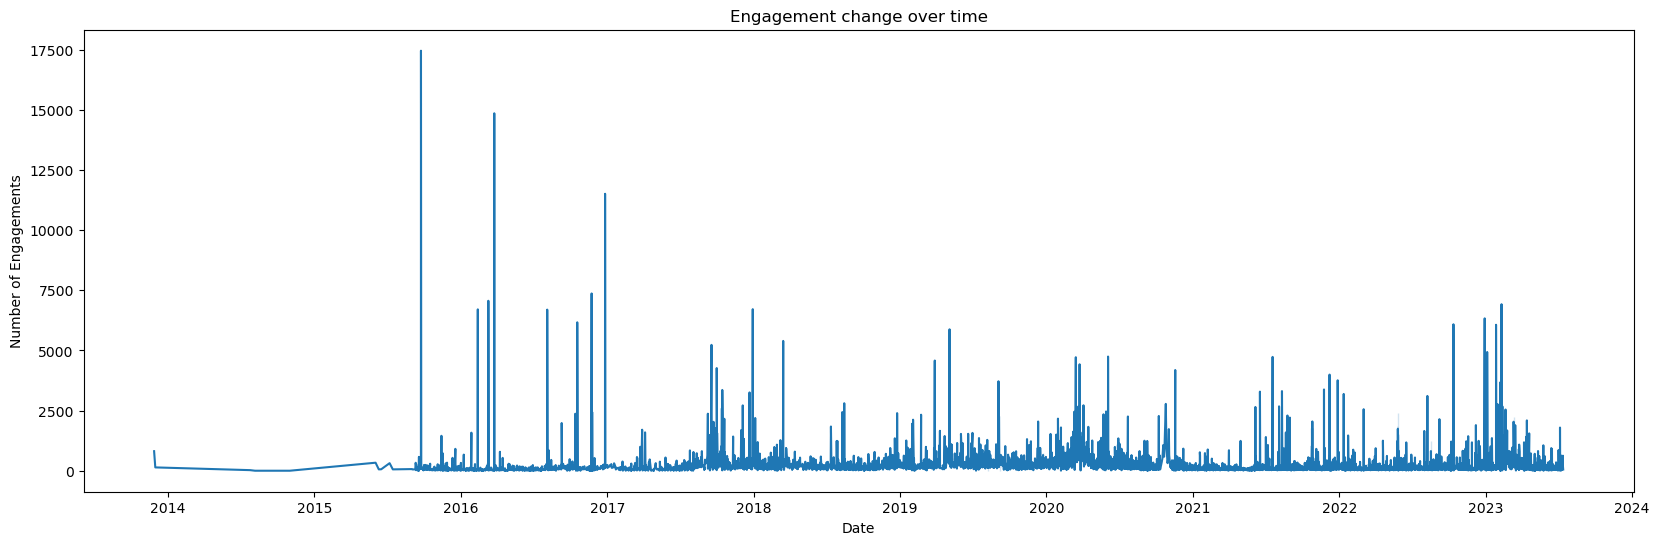

In [21]:
# remove the two highest engagements so we can see if there's a trend
engagement_change = facebook[~facebook['Post ID'].isin(['253788558082460_1170070706454236', 
                                                         '253788558082460_1174896469304993'])].sort_values(by='Date')
plot('Date', 'Engagements', engagement_change, "Engagement change over time", "Date", "Number of Engagements", type='line')

There is no trend whatsoever. We can't say that engagements increased over time.

### 4. Which types of posts (e.g., text, photos, videos) receive the most engagement?

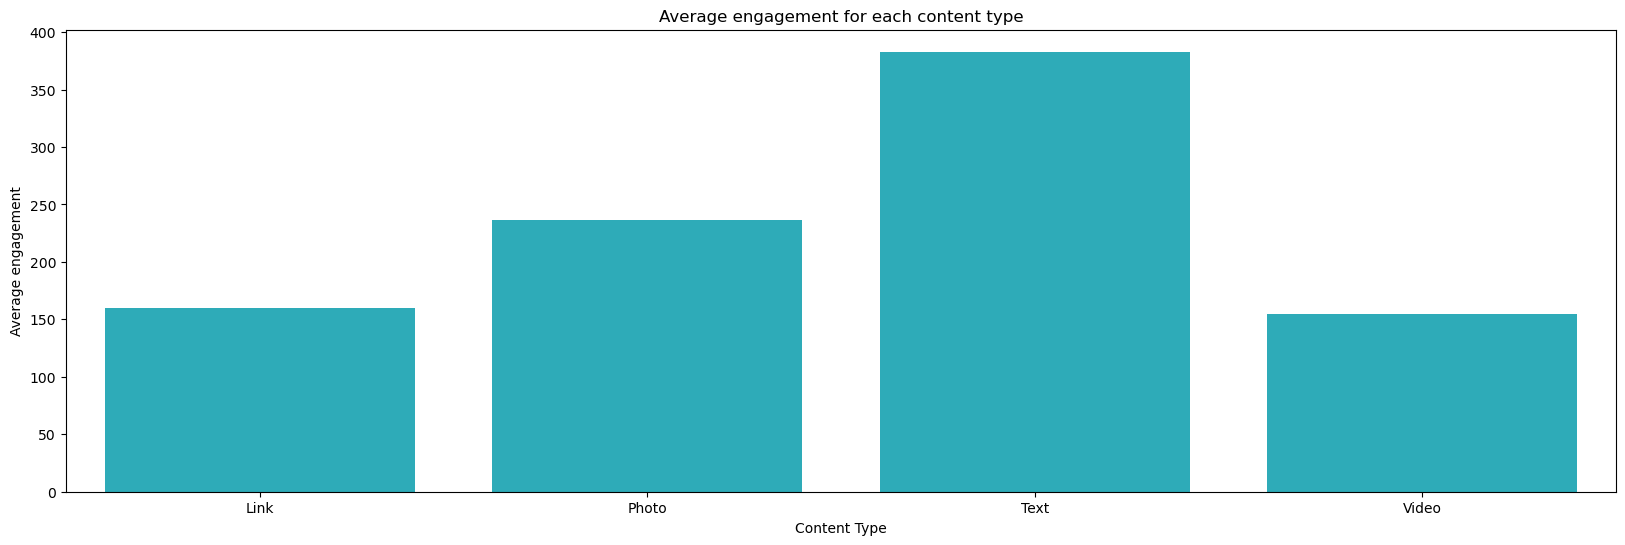

In [22]:
average_content = facebook.groupby('Content Type').mean()['Engagements'].to_frame()
plot(average_content.index, average_content['Engagements'], average_content, "Average engagement for each content type", 
     "Content Type", "Average engagement", type='bar')

On average posts that are just texts receive the most engagements. Next is photos. Videos recieve the lowest engagement, perhaps because people are reluctant to watch videos? they take too much data or they are too long?

Worth noting that Photos occur far more frequently in the dataset.

### 4.1. Which types of posts (e.g., text, photos, videos) receive the most Impressions?

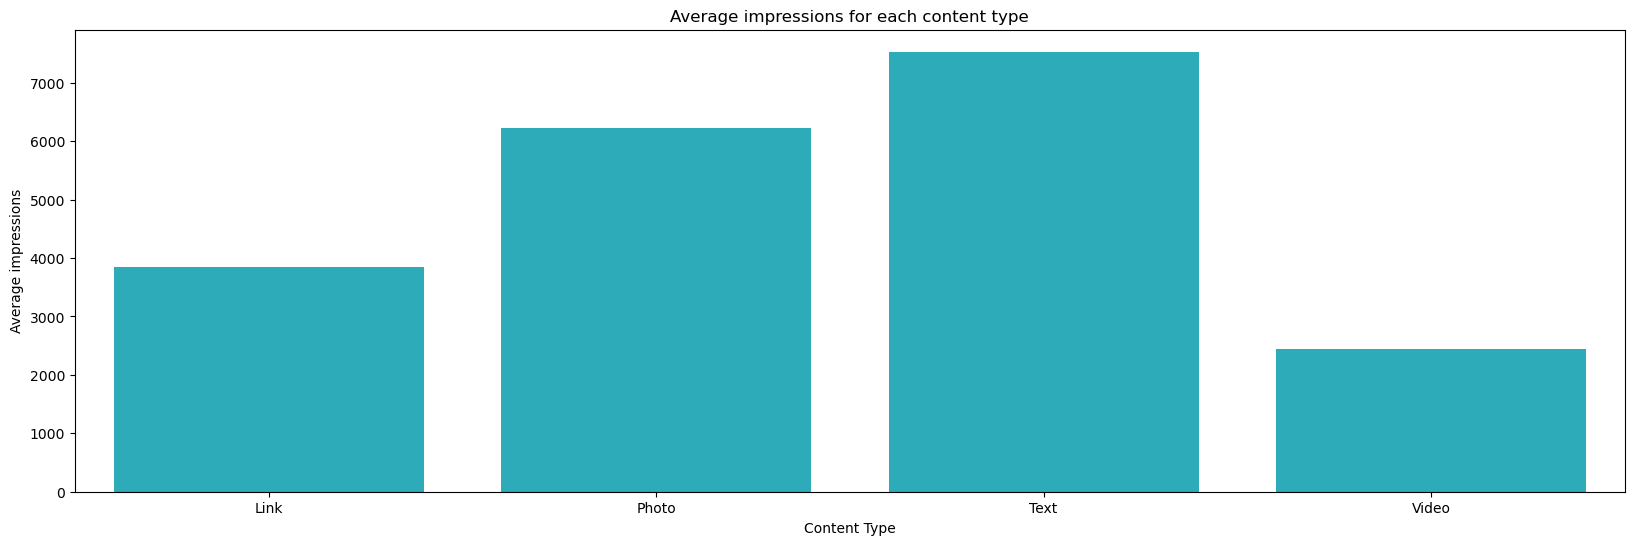

In [23]:
average_content = facebook.groupby('Content Type').mean()['Impressions'].to_frame()
plot(average_content.index, average_content['Impressions'], average_content, "Average impressions for each content type", 
     "Content Type", "Average impressions", type='bar')

Similar result as engagements. Although Text `content type` appears less frequently, it dominates for average impressions and engagemnts. Maybe increase the amount of Text `content type` that's posted?

### 5. Is there a correlation between reach and impressions?

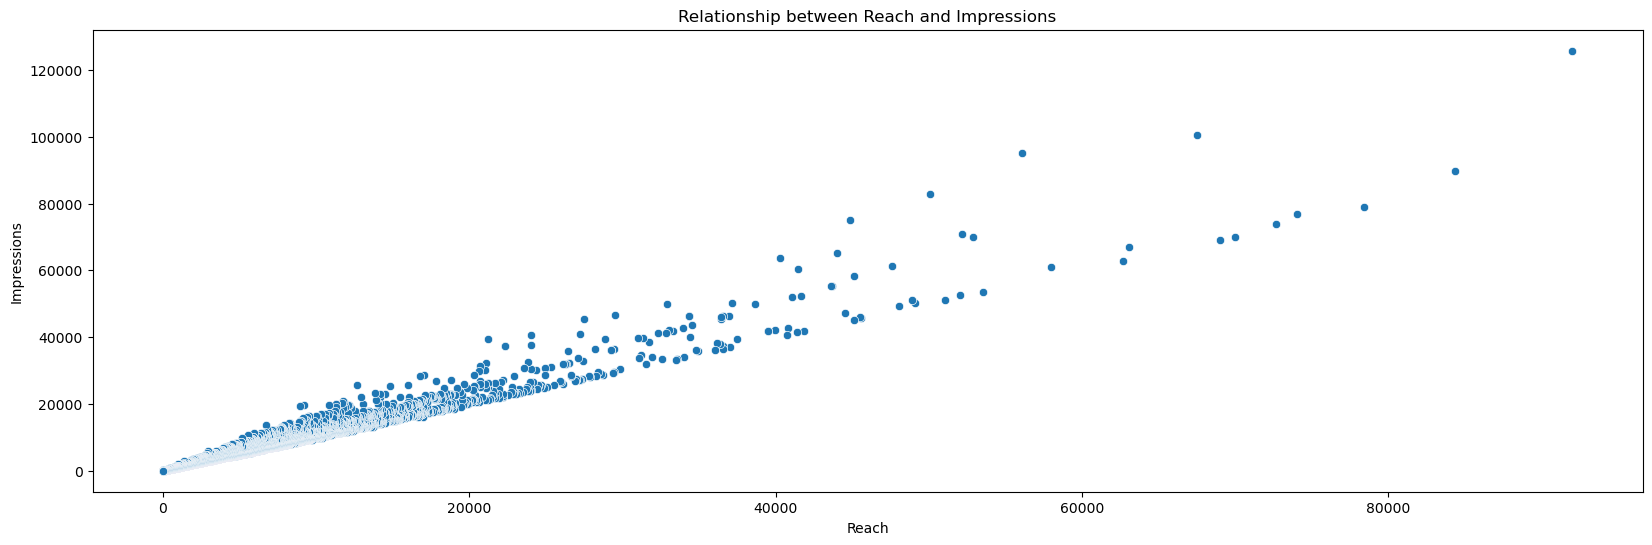

In [24]:
# There's an outlier, a post with over 200,000 Reach and Impressions. Let's filter it out first
reach_vs_impressions = facebook[facebook['Reach'] < 200000]
plot('Reach', 'Impressions', reach_vs_impressions, "Relationship between Reach and Impressions", "Reach", "Impressions", type='scatter')

There is a very strong correlation between `Reach` and `Impressions`. The Pearson correlation value in **0.98**.

### 6. Is there a correlation between comments and engagements?

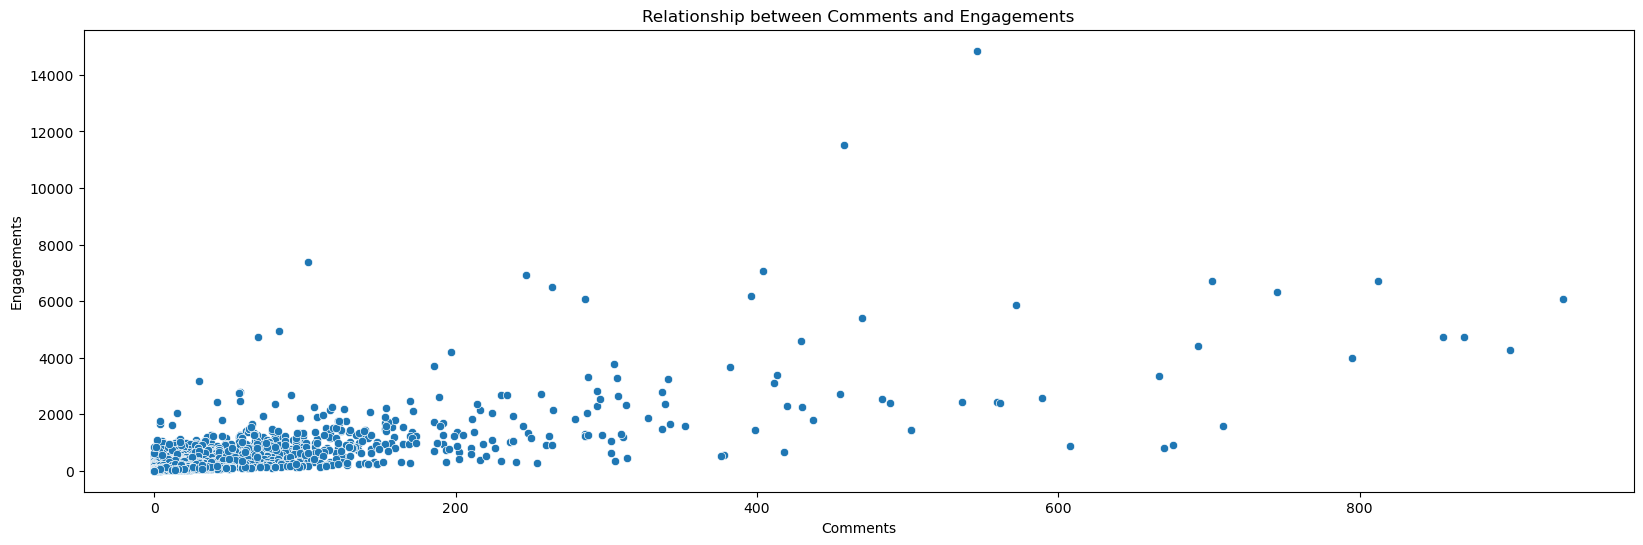

In [25]:
# Remove outliers to show trend more clearly
comments_vs_engagements = facebook[(facebook['Engagements'] < 50000) & (facebook['Comments'] < 1000)]
plot('Comments', 'Engagements', comments_vs_engagements, "Relationship between Comments and Engagements", "Comments", "Engagements", type='scatter')

There is a mild correlation between `Comments` and `Engagements`. The Pearson correlation value in **0.63**.

### 7. Identify specific dates or time periods with exceptionally high or low activity

In [26]:
facebook[facebook['Engagements'] > 7500]

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Post Video Play Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Video Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Tags
7884,2017-05-24 17:36:00,253788558082460_1174896469304993,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,You can open an account with your eyes closed....,https://www.facebook.com/StanbicIBTC/photos/a....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,60004.0,58042.0,57786.0,177.0,29.0,42.0,4.0,4.0,1384.0,578.0,0%,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7891,2017-05-18 21:32:00,253788558082460_1170070706454236,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,Avoid carrying papers. Open a Stanbic IBTC acc...,https://www.facebook.com/StanbicIBTC/photos/a....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,72474.0,70484.0,70244.0,198.0,22.0,16.0,2.0,2.0,1402.0,588.0,0%,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8118,2016-12-26 00:00:00,253788558082460_1036004336527541,Facebook,Post,Photo,Stanbic IBTC,,https://facebook.com/253788558082460_103600433...,May the warmth of Christmas fill your home wit...,https://www.facebook.com/StanbicIBTC/photos/a....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,11508.0,10898.0,10855.0,39.0,2.0,1.0,0.0,1.0,458.0,152.0,0%,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8543,2016-03-24 13:00:00,253788558082460_823237417804235,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/posts/823..

Can't really see if there is a common characteristic. Something I would have to dig into further.

### 8. How does engagement vary between weekdays and weekends or morning and evening? What are the peak times for user engagement?

In [27]:
# Saturday and Sunday is denoted by 5 and 6 respectively
weekends = facebook[facebook['Date'].dt.dayofweek > 4]
weekdays = facebook[facebook['Date'].dt.dayofweek < 5]

In [28]:
weekends.Engagements.mean(), weekdays.Engagements.mean()

(217.40067911714772, 235.22481055290484)

In [29]:
weekends.Impressions.mean(), weekdays.Impressions.mean()

(6562.0045274476515, 5683.088408644401)

The average Impressions on posts are significantly higher on weekends while the average Engagements are higher on weekdays. This means that people spend more time on their phones during weekends, hence higher impressions, but people engage more during the weekdays.

This means posts should be made during the weekdays for more engagements?

In [30]:
morning = weekdays[weekdays['Date'].dt.hour < 12]
evening = weekdays[weekdays['Date'].dt.hour >= 12]

In [31]:
morning.Engagements.mean(), evening.Engagements.mean()

(231.03091832025842, 237.05747126436782)

In [32]:
morning.Impressions.mean(), evening.Impressions.mean()

(5885.465620673743, 5594.652954224642)

In [33]:
morning = weekends[weekends['Date'].dt.hour < 12]
evening = weekends[weekends['Date'].dt.hour >= 12]

In [34]:
morning.Engagements.mean(), evening.Engagements.mean()

(226.06451612903226, 213.06876061120542)

In [35]:
morning.Impressions.mean(), evening.Impressions.mean()

(6294.585738539899, 6695.713921901528)

The average number of Engagements on posts is higher in the evenings for weekdays, perhaps people are busy with work in the mornings. This is corroborated by the fact that the average number of Engagments in posts is higher in the mornings for weekends.

It is worth noting that Engagements are higher on weekdays in general, mornings or evenings. 

The average number of Impressions is highest in the evenings of weekends. We can say that more people scroll through social media during these evenings hence the high impressions.

For weekdays, the average number of impressions is higher in the mornings. 

It is worth noting that Impressions are higher on weekends in general, mornings or evenings. 

### 9. What is the relationship between reach and engagement?

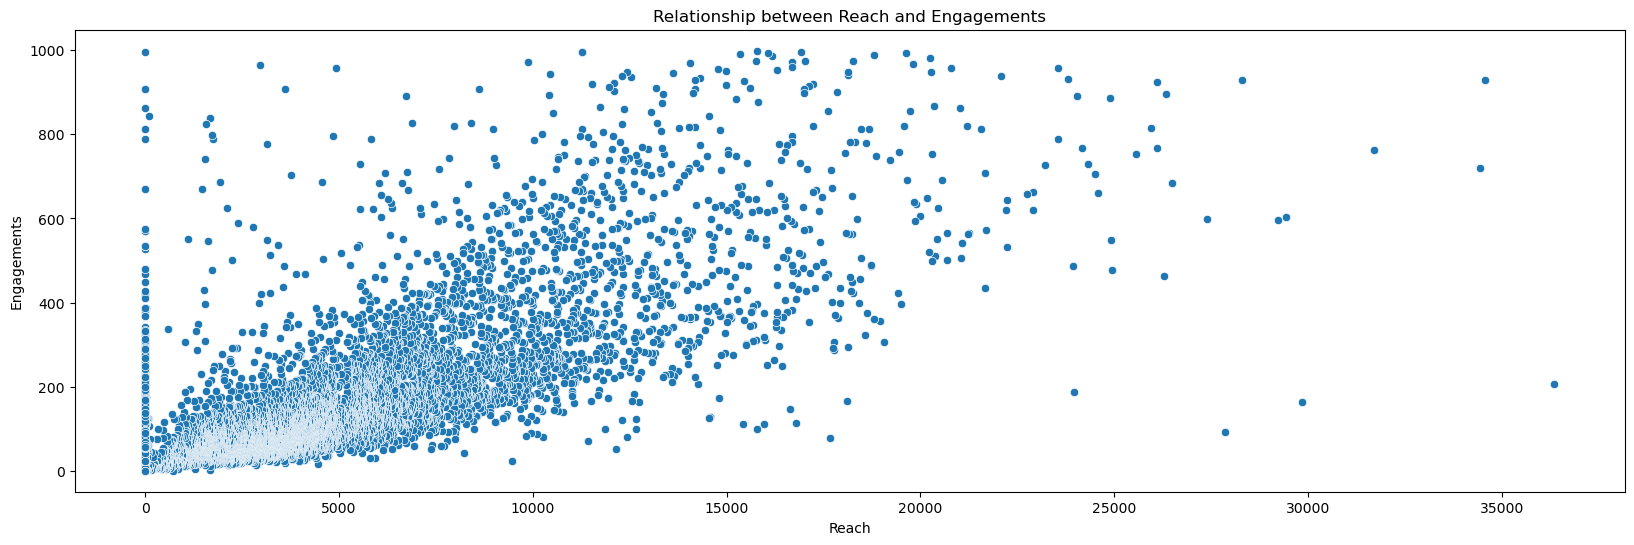

In [36]:
# Remove outliers to show trend more clearly
reach_vs_engagements = facebook[(facebook['Engagements'] < 1000) & (facebook['Reach'] < 40000)]
plot('Reach', 'Engagements', reach_vs_engagements, "Relationship between Reach and Engagements", "Reach", "Engagements", type='scatter')

There is a strong relationship between `Reach` and `Engagements`. Removing very high values for both columns shows the trend more clearly. The pearson correlation value is **0.75**.

This also implies that there is a similar strong relationship between `Impressions` and `Engagements`

### 10. Does the number of shares affect the engagements on a post?


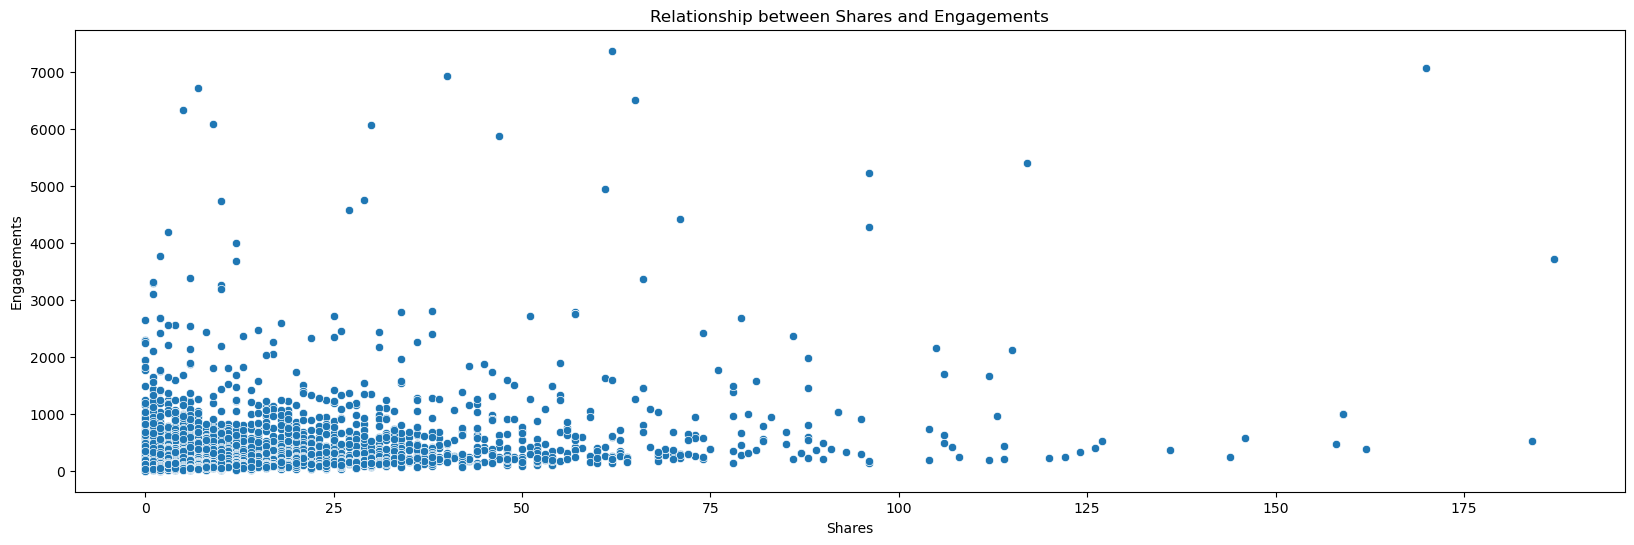

In [37]:
# Remove outliers to show trend more clearly
shares_vs_engagements = facebook[(facebook['Engagements'] < 7500) & (facebook['Shares'] < 200)]
plot('Shares', 'Engagements', shares_vs_engagements, "Relationship between Shares and Engagements", "Shares", "Engagements", type='scatter')

There is a weak correlation between `Shares` and `Engagments`. The number of Shares does not affect the engagements on a post. 

The Pearson correlation value is **0.36**

### 11. How many users watch 95% of the whole video as compared to the first 10 seconds?

In [38]:
ten_secs = facebook_video['10-Second Video Views'] / facebook_video['Video Views']
ten_secs = ten_secs[(ten_secs >= 0) & (ten_secs <= 1)]  # Remove Nan and infinity values
ten_secs.mean()

0.436169901952034

On average, **43.6%** of people that view the videos watch at least the first 10 seconds.

In [39]:
almost_viewed = facebook_video['95% Video Views'] / facebook_video['Video Views']
almost_viewed = almost_viewed[(almost_viewed >= 0) & (almost_viewed <= 1)]  # Remove Nan and infinity values
almost_viewed.mean()

0.2259463247172153

On average, **22.6%** of people that view the videos watch at least 95% of the whole video.

In [40]:
less_than_10secs_vid = facebook_video[facebook_video['Video Length (Seconds)'] <= 10]  # videos that are 10 secs or less
almost_viewed = less_than_10secs_vid['95% Video Views'] / less_than_10secs_vid['Video Views']
almost_viewed = almost_viewed[(almost_viewed >= 0) & (almost_viewed <= 1)]  # Remove Nan and infinity values
almost_viewed.mean()

0.5594221271063096

In [41]:
less_than_10secs_vid = facebook_video[facebook_video['Video Length (Seconds)'] > 10]  # videos that are 10 secs or less
almost_viewed = less_than_10secs_vid['95% Video Views'] / less_than_10secs_vid['Video Views']
almost_viewed = almost_viewed[(almost_viewed >= 0) & (almost_viewed <= 1)]  # Remove Nan and infinity values
almost_viewed.mean()

0.14959186513571232

On average, **56%** of people that view the videos watch 95% of the whole video if it's 10 seconds or less.

And only **15%** of people that view the videos watch 95% of the whole video if it's more than 10 seconds.

Attention span of people generally reduce the longer a video is. Shortening the video length could increase watch time.

### 12. How does Sound on for videos compare to sound off?

In [42]:
sound_off = facebook_video['Sound off Video Views'] / facebook_video['Video Views']
sound_off = sound_off[(sound_off >= 0) & (sound_off <= 1)]  # Remove Nan and infinity values
sound_off.mean()

0.37512545833379607

**37.5%** of people watch videos with the sound off. This is a pretty high number. This means that they don't even hear the information the video is passing across.

This can be solved by using texts in the videos so that users can read whether the sound is off or on.

### 13. Does shorter videos get more clicks?

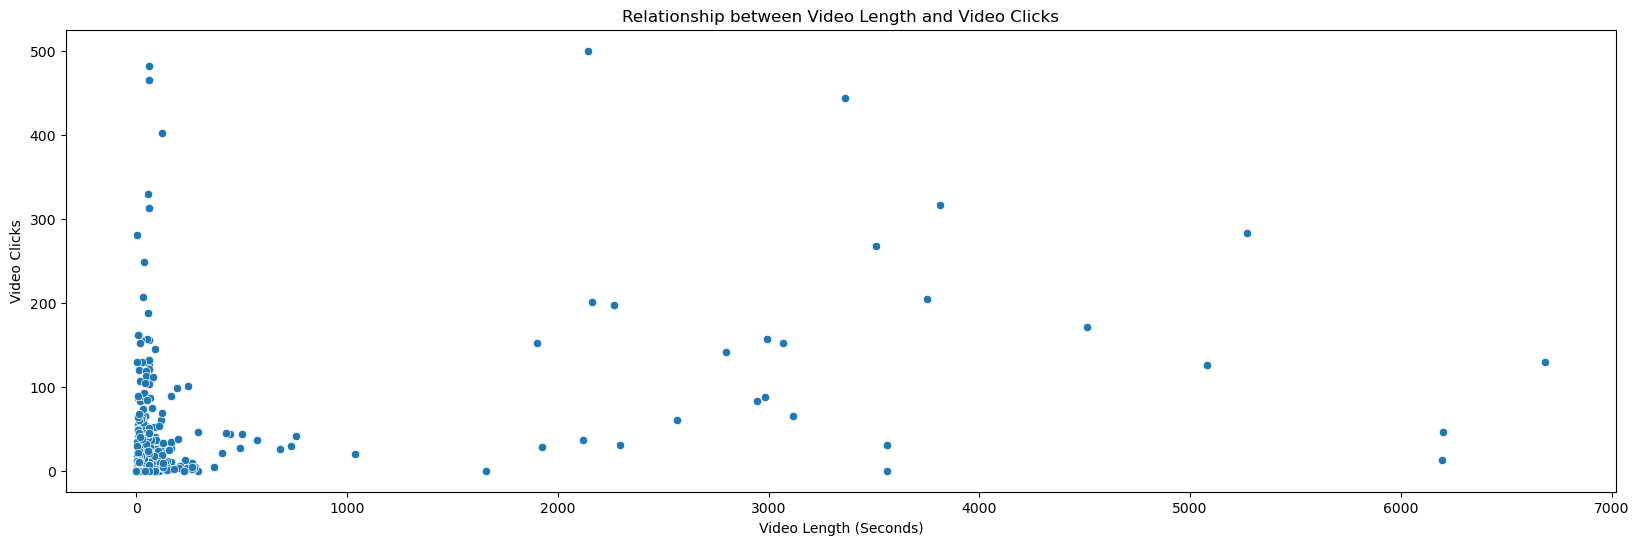

In [43]:
# Remove outliers to show trend more clearly
vidLength_vs_vidClicks = facebook[(facebook['Video Length (Seconds)'] < 8000) & (facebook['Post Video Play Clicks'] < 600)]
plot('Video Length (Seconds)', 'Post Video Play Clicks', vidLength_vs_vidClicks, "Relationship between Video Length and Video Clicks", "Video Length (Seconds)", "Video Clicks", type='scatter')

There is a weak correlation between `Video length` and `Video clicks`. We cannot say that there is a relationship between `Video length` and `Video clicks`. The Pearson correlation value is **0.32**

### 13.1. Does shorter videos get more engagements?

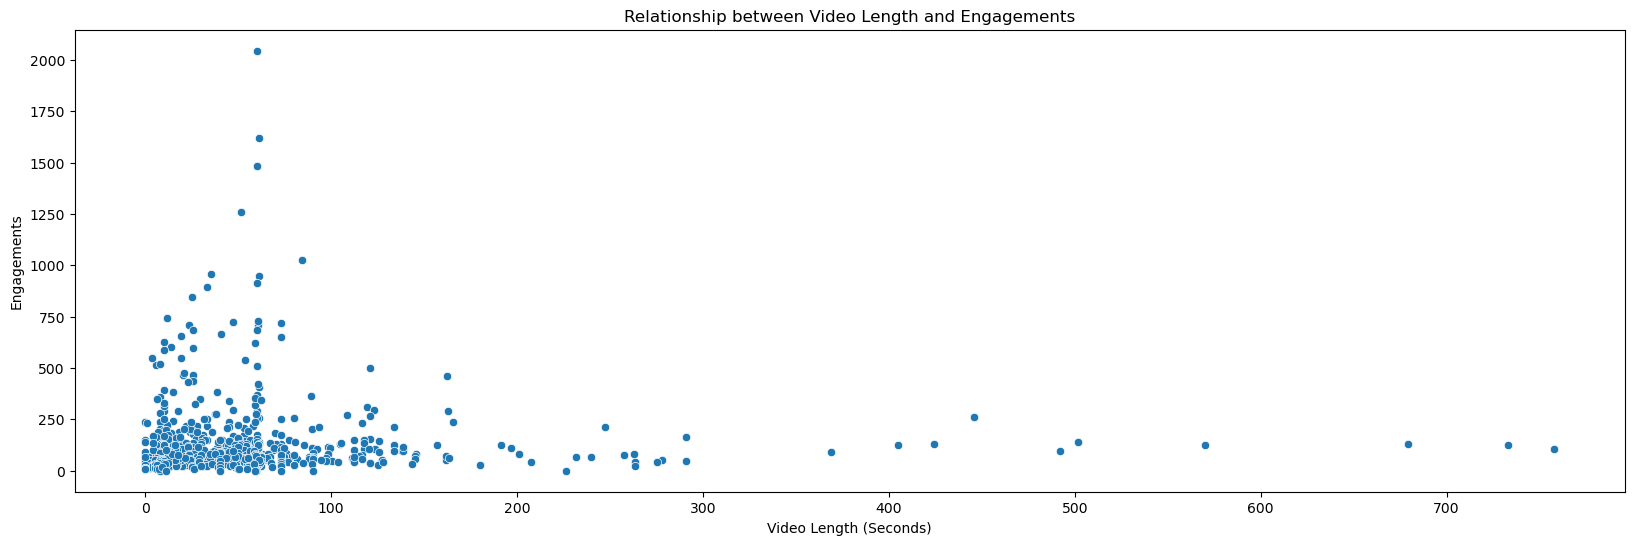

In [44]:
# Remove outliers to show trend more clearly
vidLength_vs_engagements = facebook[(facebook['Video Length (Seconds)'] < 1000) & (facebook['Engagements'] < 3000)]
plot('Video Length (Seconds)', 'Engagements', vidLength_vs_engagements, "Relationship between Video Length and Engagements", "Video Length (Seconds)", "Engagements", type='scatter')

There is a weak correlation between `Video length` and `Engagements`. The Pearson correlation value is **0.34**.

### 14. Do posts with tags perform better in terms of engagement and reach?

In [45]:
tags = facebook['Tags'].dropna().unique()  # Get the tags 
facebook_tags = facebook[facebook['Tags'].isin(tags)]  # Filter the posts that have tags
facebook_tags.Engagements.mean(), facebook_tags.Reach.mean()

(139.81226295828066, 4216.521491782553)

In [46]:
tags = facebook['Tags'].dropna().unique()
facebook_no_tags = facebook[~facebook['Tags'].isin(tags)]  # Filter the posts that do not have tags
facebook_no_tags.Engagements.mean(), facebook_no_tags.Reach.mean()

(251.5628504992477, 5425.756120913692)

Posts that do not have `Tags` perform significantly better in terms of `Engagement` and `Reach`. Perhaps the Facebook algorithm does not like Tags on a post.

### 15. Are engagements affected by who sends the post?

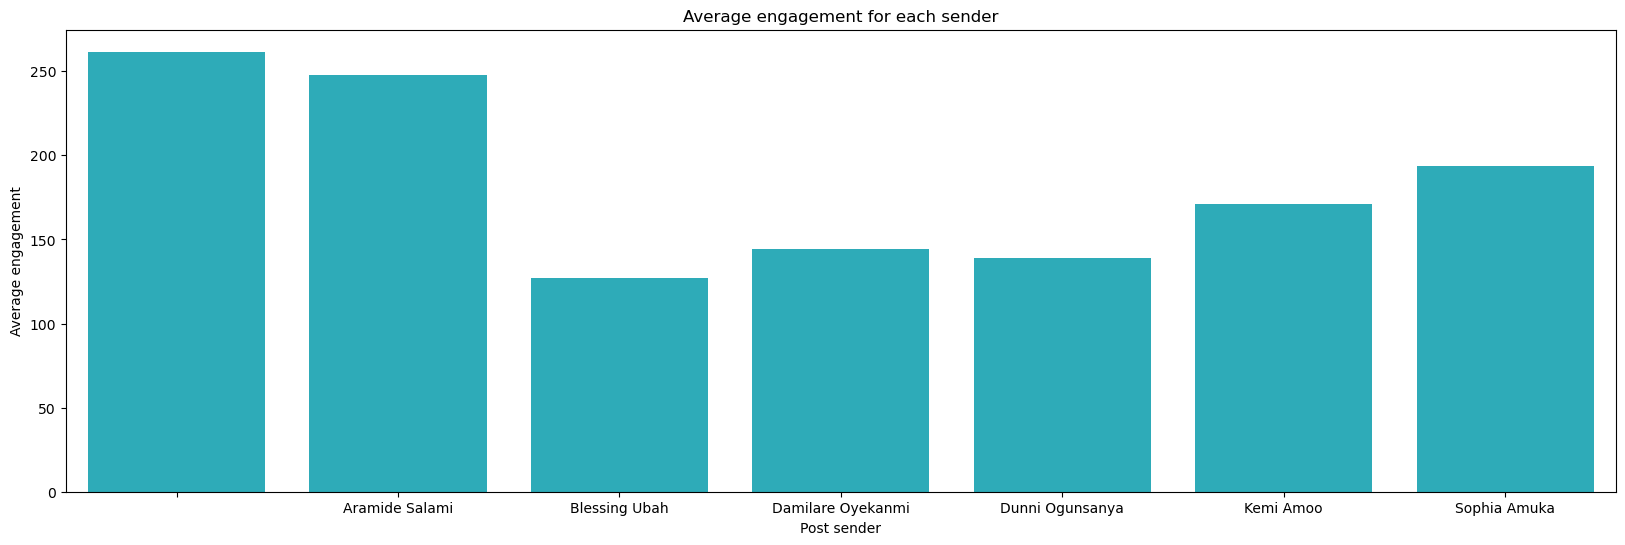

In [47]:
sender_engagement = facebook.groupby('Sent by').mean()['Engagements'].to_frame()
plot(sender_engagement.index, sender_engagement['Engagements'], sender_engagement, "Average engagement for each sender", 
     "Post sender", "Average engagement", type='bar')

**Aramide Salami** has the highest average engagement of all the senders by a lot (**247.46**). **Sophia Amuka** has the second highest average engagement (**193.69**).

### 16. Does the number of comments influence the amount of clicks or vice versa?

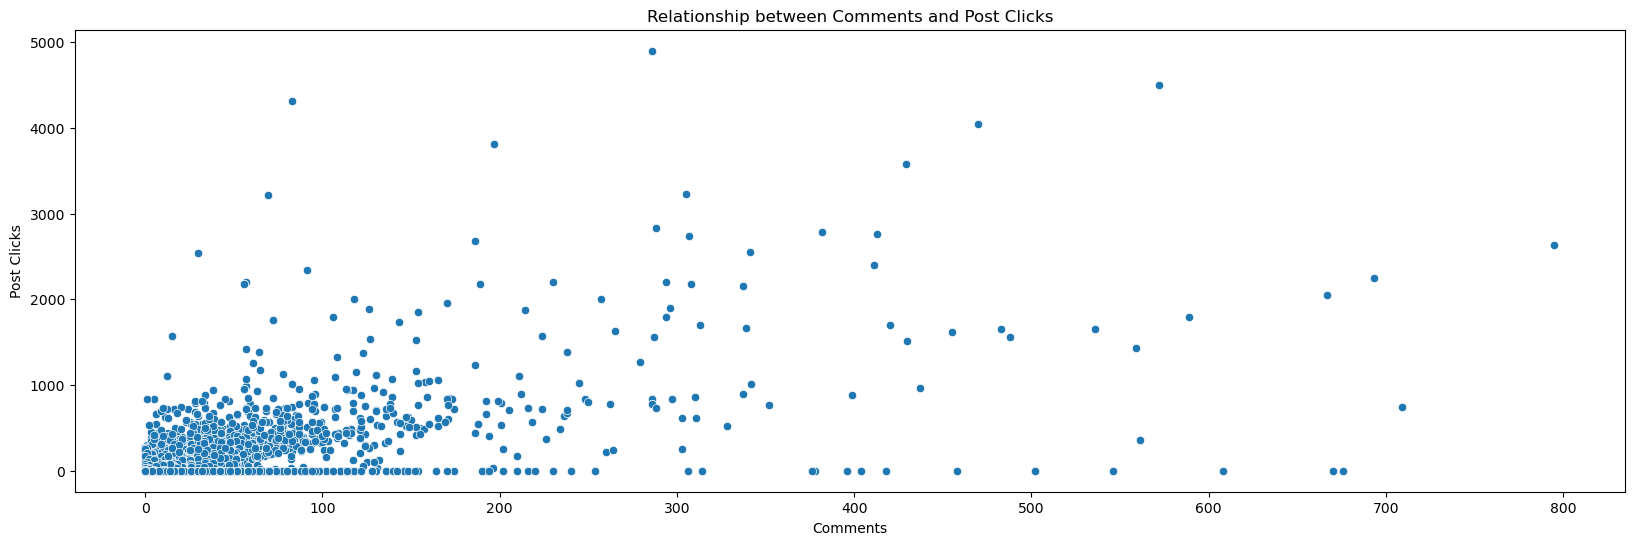

In [48]:
# Remove outliers to show trend more clearly
comments_vs_clicks = facebook[(facebook['Comments'] < 800) & (facebook['Post Clicks (All)'] < 5000)]
plot('Comments', 'Post Clicks (All)', comments_vs_clicks, "Relationship between Comments and Post Clicks", "Comments", "Post Clicks", type='scatter')

There is a positive relationship between `comments` and `post clicks`. There is a relationship between `comments` and `post clicks`. The pearson correlation value is **0.62**

### 17. How does unique clicks compare when grouped by content type.

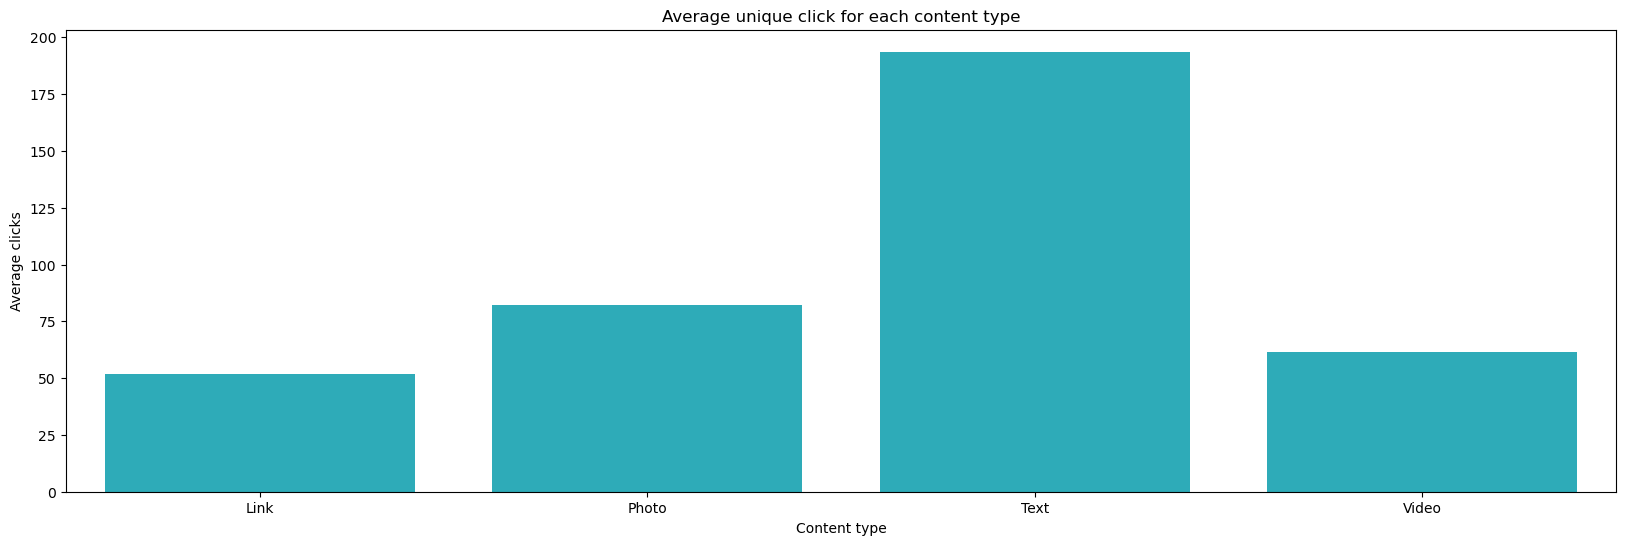

In [49]:
content_clicks = facebook.groupby('Content Type').mean()['Unique Post Clicks'].to_frame()
plot(content_clicks.index, content_clicks['Unique Post Clicks'], content_clicks, "Average unique click for each content type", 
     "Content type", "Average clicks", type='bar')

Text by far attracts more `unique clicks` by users on average. They are also the `content type` with the highest average `impressions` and `engagements`.

--------------------------------------------------------------------------------------------------------------------------------

# Instagram

In [50]:
instagram.shape

(10000, 147)

In [51]:
instagram_columns = instagram.columns  # save column list

In [52]:
instagram_dropped_cols = []

# drop columns that are empty
for column in instagram_columns:
    if instagram[column].isna().sum() == instagram.shape[0]:  # if all the rows are empty
        instagram_dropped_cols.append(column)
        instagram.drop(columns=column, inplace=True)

In [53]:
instagram.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves,Video Views,Organic Video Views,Tags
0,1/30/2023 5:06 pm,18216468940204235,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,"39,681","39,681","32,418","32,418",4.89%,5.99%,"1,942","1,261","1,261",56,625.0,0,0,NaN
1,4/15/2022 9:04 am,17971531720518163,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,"29,186","29,186","25,055","25,055",6.04%,7.04%,"1,763",709,709,"1,033",21.0,NaN,NaN,NaN
2,5/28/2021 8:45 pm,18008486986321009,Instagram,Post,Video,stanbicibtc,,https://www.instagram.com/p/CPbcdjygiaK/,Reposted from @mzdosunmu My son's entry\n#ITCA...,"21,175","21,175","19,237","19,237",3.48%,3.83%,736,702,702,23,11.0,"10,392","10,392",NaN


In [54]:
instagram.shape

(10000, 23)

## Data Cleaning

**Convert the date column to datetime datatype.**

In [55]:
am_pm = instagram['Date'].str.contains('am')

In [56]:
date_hold = pd.to_datetime(instagram['Date'].str.upper(), format="%m/%d/%Y %H:%M %p")

In [57]:
for idx, am in enumerate(am_pm):
    if not am and date_hold[idx].hour != 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)
    if am and date_hold[idx].hour == 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)

In [58]:
instagram['Date'] = date_hold

In [59]:
# Turn all numerical values columns to float to take care of NaNs that are making columns object datatype
for col in instagram.columns:
    if col == "Post ID":
        continue
    try:
        instagram[col] = instagram[col].str.replace(",", "")
        instagram[col] = instagram[col].astype("float")
    except:
        continue

In [60]:
# Divide the dataset into the four content types. Makes it easier to deal with
instagram_photo = instagram[instagram['Content Type'] == 'Photo']
instagram_video = instagram[instagram['Content Type'] == 'Video']
instagram_carousel = instagram[instagram['Content Type'] == 'Carousel']

In [ ]:
instagram.to_csv("Instagram_cleaned.csv", index=False)

## Exploratory Data Analysis

In [61]:
instagram.sample()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves,Video Views,Organic Video Views,Tags
800,2020-09-23 19:00:00,17877300802870488,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CFfQK-nl19q/,Chemistry students get in here!\n\nWrite the c...,3588.0,3588.0,3294.0,3294.0,2.98%,3.25%,107.0,78.0,78.0,25.0,4.0,NaN,NaN,NaN


### 1. What is the timeframe covered by the data?

In [62]:
instagram.Date.min(), instagram.Date.max()

(Timestamp('2014-12-22 17:59:00'), Timestamp('2023-07-13 12:03:00'))

Approximately 9 years.

### 2. Which posts has the highest engagements?

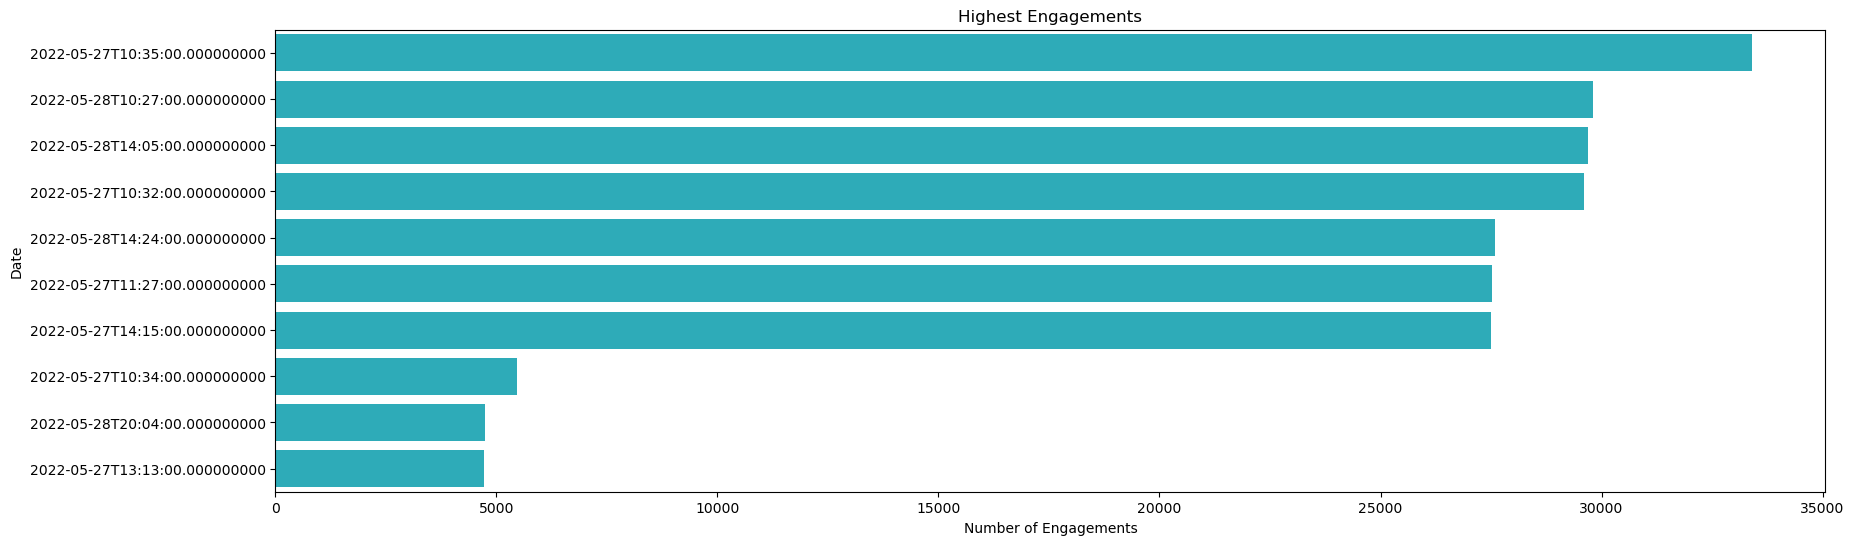

In [63]:
highest_engagements = instagram.sort_values(by='Engagements', ascending=False).head(10)
plot('Engagements', 'Date', highest_engagements, "Highest Engagements", "Number of Engagements", "Date", type='bar')

The first 7 have significantly higher engagements than the rest. Another thing to note is that all the posts are from **27th May 2022** and **28th May 2022**.

On these two days, there was a giveaway competition going on, #DreamsCanBe #ItCanBe. The posts were videos of children using the two hashtags.

### 2.1. Which posts has the highest impressions?

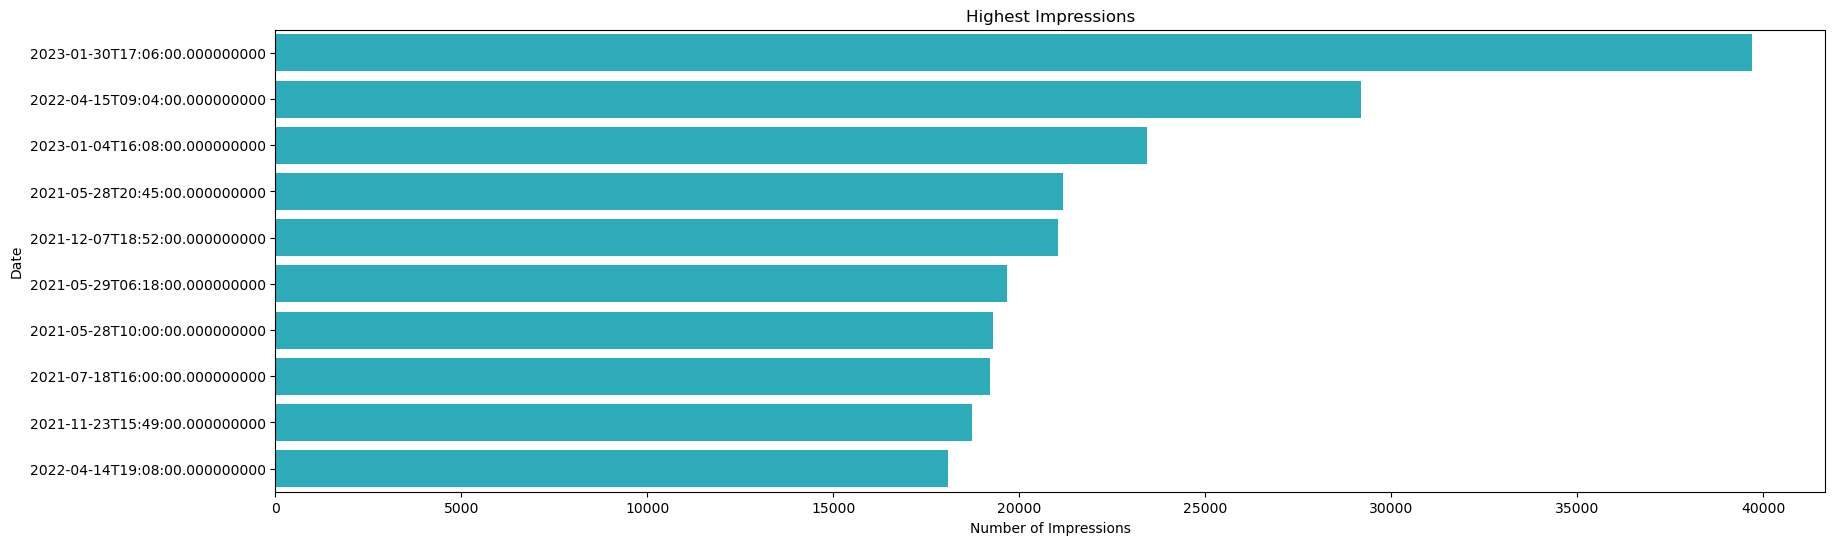

In [64]:
highest_impressions = instagram.sort_values(by='Impressions', ascending=False).head(10)
plot('Impressions', 'Date', highest_impressions, "Highest Impressions", "Number of Impressions", "Date", type='bar')

The post made on **January 30, 2023** has significantly higher impressions than the rest of the top 10.

The post was about depositing old naira notes to collect new ones. The second highest posts was made on Good Friday. Both posts had the #ItCanBe hashtag.

### 2.2. Which posts had the highest reach?

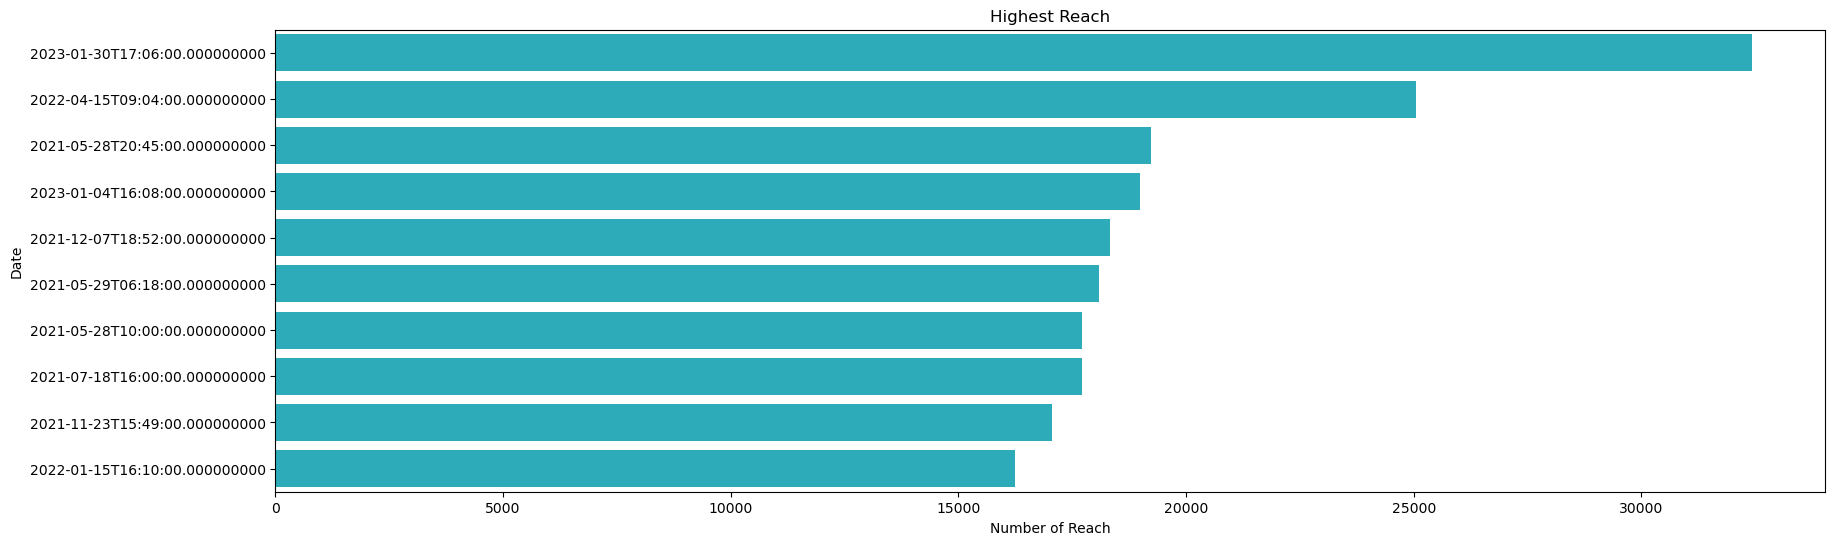

In [65]:
highest_reach = instagram.sort_values(by='Reach', ascending=False).head(10)
plot('Reach', 'Date', highest_reach, "Highest Reach", "Number of Reach", "Date", type='bar')

The post made on **January 30, 2023** has significantly higher reach than the rest of the top 10.

The post was about depositing old naira notes to collect new ones. The second highest posts was made on Good Friday. Both posts had the #ItCanBe hashtag.

### 3. Which types of posts (e.g., photos, videos) receive the most engagement?

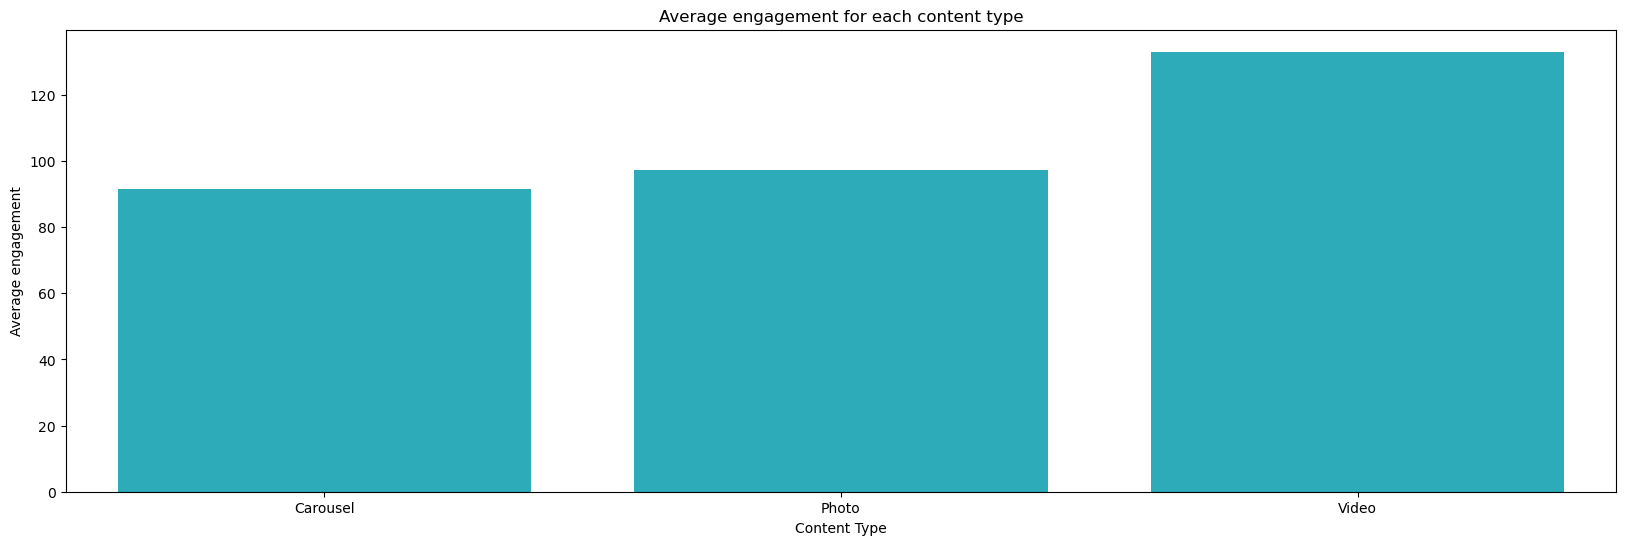

In [66]:
average_content = instagram.groupby('Content Type').mean()['Engagements'].to_frame()
plot(average_content.index, average_content['Engagements'], average_content, "Average engagement for each content type", 
     "Content Type", "Average engagement", type='bar')

On average, Videos receive by far the most engagement on Instagram.

### 3.1. Which types of posts (e.g., photos, videos) receive the most impressions?

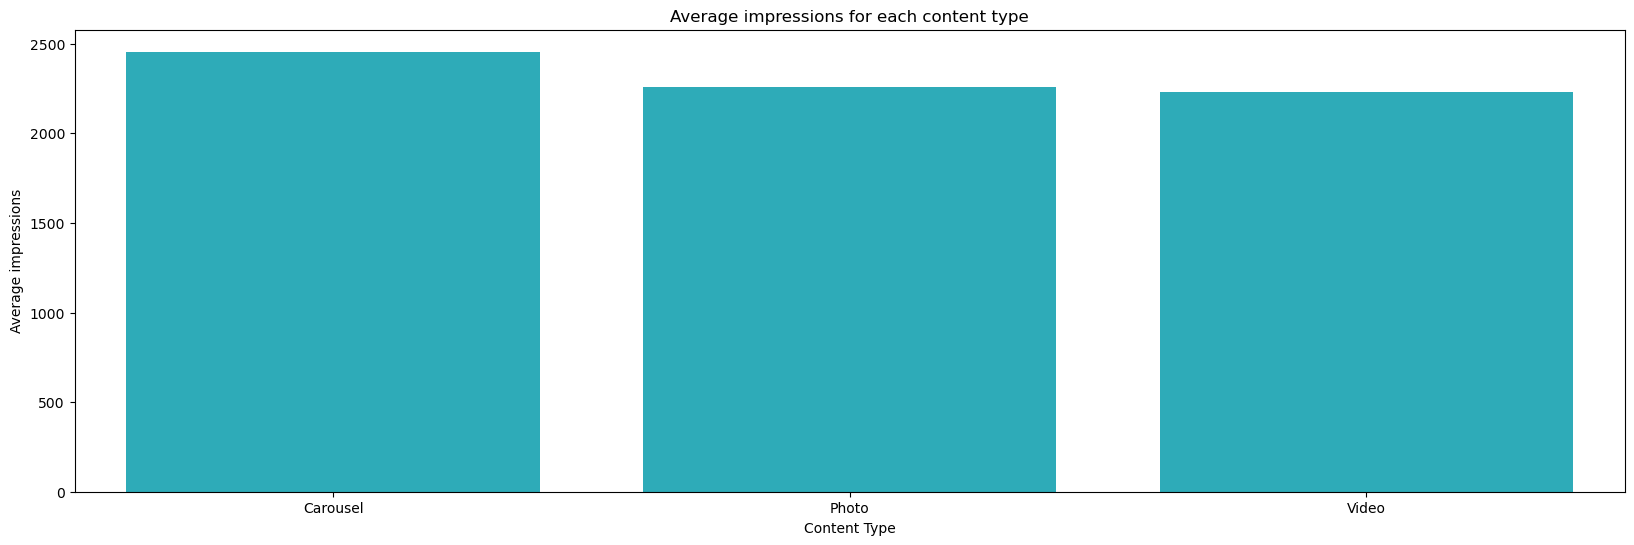

In [67]:
average_content = instagram.groupby('Content Type').mean()['Impressions'].to_frame()
plot(average_content.index, average_content['Impressions'], average_content, "Average impressions for each content type", 
     "Content Type", "Average impressions", type='bar')

On average, Carousels have the most impressions on Instagram.

### 4. Is there a correlation between reach and impresssions

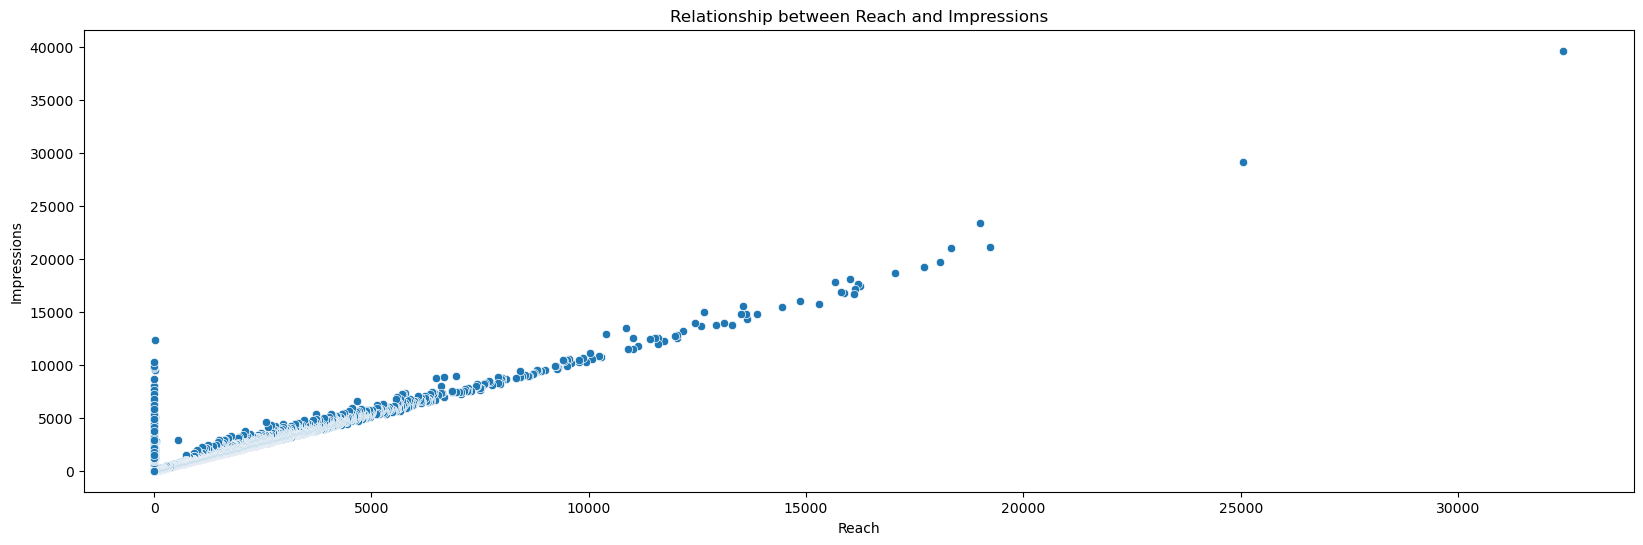

In [68]:
plot('Reach', 'Impressions', instagram, "Relationship between Reach and Impressions", "Reach", "Impressions", type='scatter')

There are some posts with zero as the value for `Reach`, but for the most part, there is a strong correlation between `reach` and `impressions`. The pearson correlation value is **0.82**

### 5. Is there a correlation between reactions and engagements

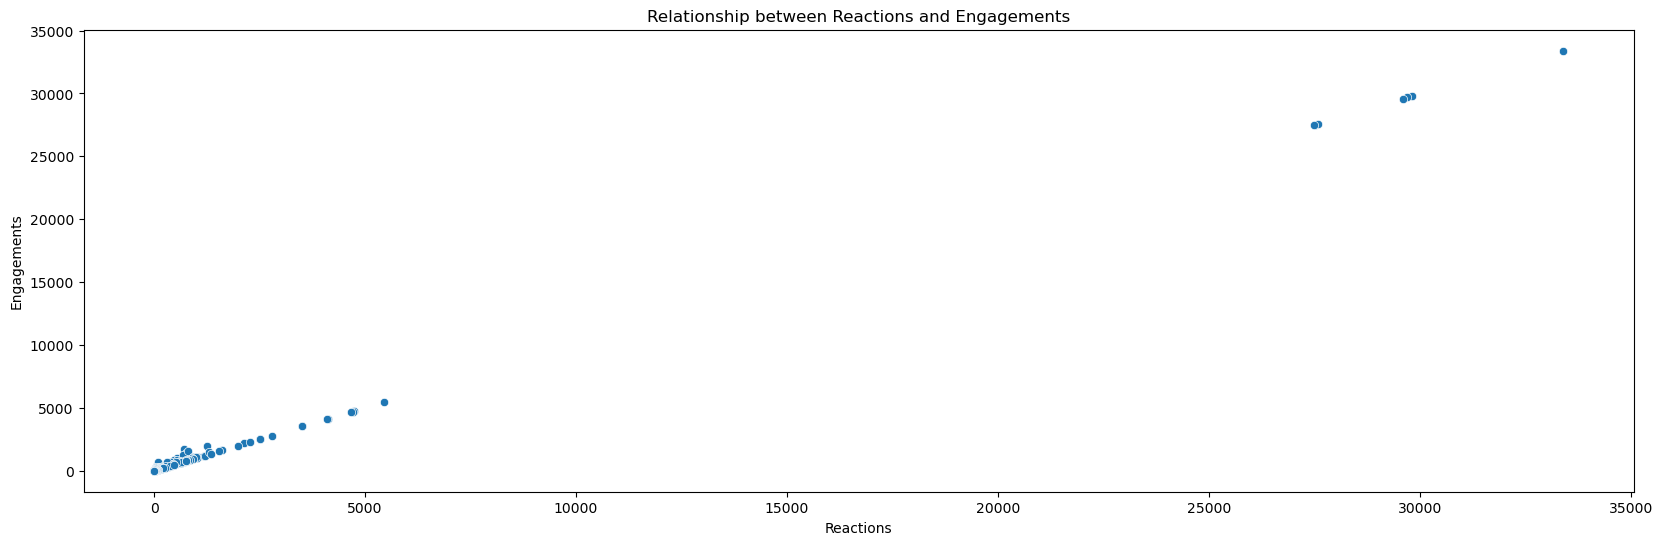

In [69]:
plot('Reactions', 'Engagements', instagram, "Relationship between Reactions and Engagements", "Reactions", "Engagements", type='scatter')

There is a linear relationship between `reactions` and `engagements`. The pearson correlation value is **0.99**.

Other features like `comments` and `saves` have no effect on the engagement. 



### 6. How does engagement vary between weekdays and weekends or morning and evening? What are the peak times for user engagement?


In [70]:
# Saturday and Sunday is denoted by 5 and 6 respectively
weekends = instagram[instagram['Date'].dt.dayofweek > 4]
weekdays = instagram[instagram['Date'].dt.dayofweek < 5]

In [71]:
weekends.Engagements.mean(), weekdays.Engagements.mean()

(127.62278710848842, 92.78927792740798)

In [72]:
weekends.Impressions.mean(), weekdays.Impressions.mean()

(2595.1221139045665, 2178.507385411908)

Average Engagements and Impressions on posts are generally higher on weekends. 

This means that targeting posts on weekends is a viable strategy for getting more engagements and impressions.

In [73]:
morning = weekdays[weekdays['Date'].dt.hour < 12]
evening = weekdays[weekdays['Date'].dt.hour >= 12]

In [74]:
morning.Engagements.mean(), evening.Engagements.mean()

(117.587109375, 80.66736681306091)

In [75]:
morning.Impressions.mean(), evening.Impressions.mean()

(2060.440402106271, 2233.58597588209)

In [76]:
morning = weekends[weekends['Date'].dt.hour < 12]
evening = weekends[weekends['Date'].dt.hour >= 12]

In [77]:
morning.Engagements.mean(), evening.Engagements.mean()

(108.3076923076923, 141.55078125)

In [78]:
morning.Impressions.mean(), evening.Impressions.mean()

(2434.6039215686274, 2698.835304054054)

During the weekdays, Engagements are higher in the mornings and Impressions are higher in the evenings. This could mean that people are willing to react to posts in the mornings, even though more people are online to see posts in the evenings.

During the weekends, as expected, Engagements and Impressions are higher in the evenings. Most people are at home and this increases the chances of them being on social media.

### 7. What is the relationship between impressions and engagement?

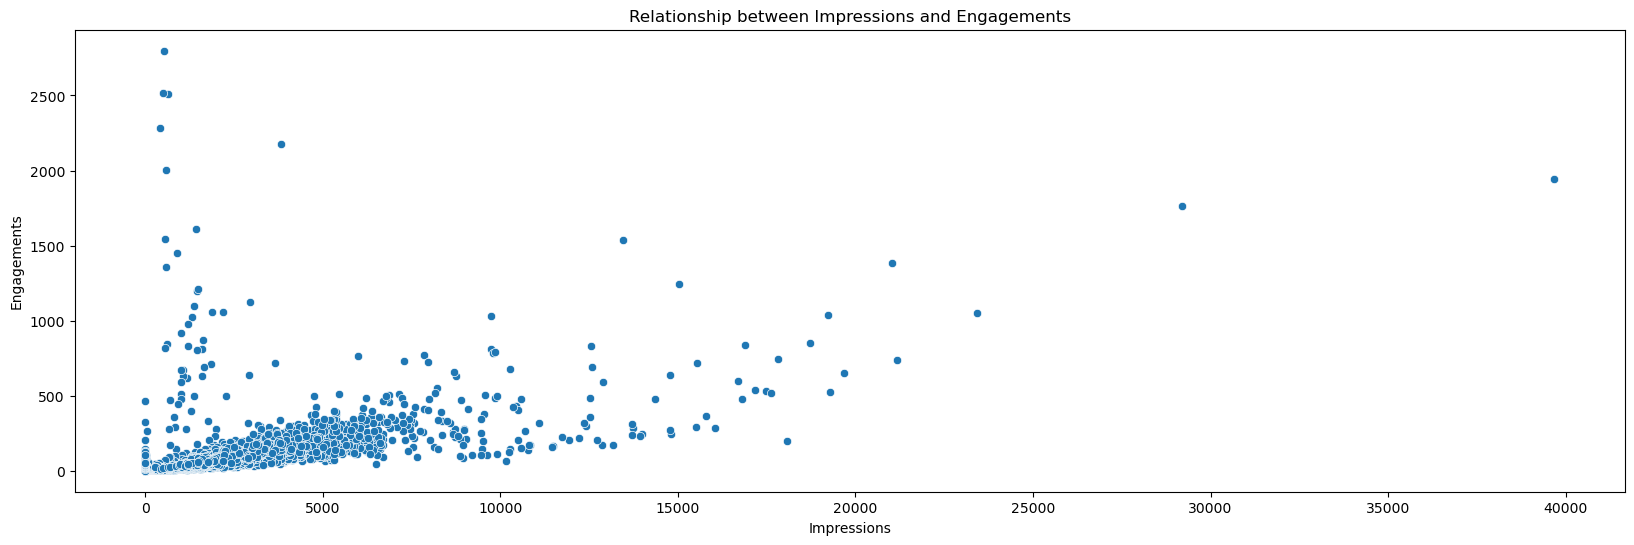

In [79]:
# Remove outliers to show trend more clearly
reach_vs_engagements = instagram[(instagram['Engagements'] < 3000) & (instagram['Impressions'] < 40000)]
plot('Impressions', 'Engagements', reach_vs_engagements, "Relationship between Impressions and Engagements", "Impressions", "Engagements", type='scatter')

There is a mild relationship between `Impressions` and `Engagements`. The pearson correlation value is **0.54**.

### 8. Do posts with tags perform better in terms of engagement and reach?

In [80]:
tags = instagram['Tags'].dropna().unique()  # Get the tags 
instagram_tags = instagram[instagram['Tags'].isin(tags)]  # Filter the posts that have tags
instagram_tags.Engagements.mean(), instagram_tags.Reach.mean(), instagram_tags.Impressions.mean()

(47.964424320827945, 1614.1098684210526, 1783.1368421052632)

In [81]:
tags = instagram['Tags'].dropna().unique()  # Get the tags 
instagram_tags = instagram[~instagram['Tags'].isin(tags)]  # Filter the posts that do not have tags
instagram_tags.Engagements.mean(), instagram_tags.Reach.mean(), instagram_tags.Impressions.mean()

(110.06363851431276, 1478.9955688965124, 2380.4721269296742)

Posts that do not have Tags perform significantly better in terms of average number of `Engagement` and `Impressions`. Posts that have Tags have a higher average `Reach`. Perhaps the Instagram algorithm does not like Tags on a post.

### 9. Are engagements affected by who sends the post?

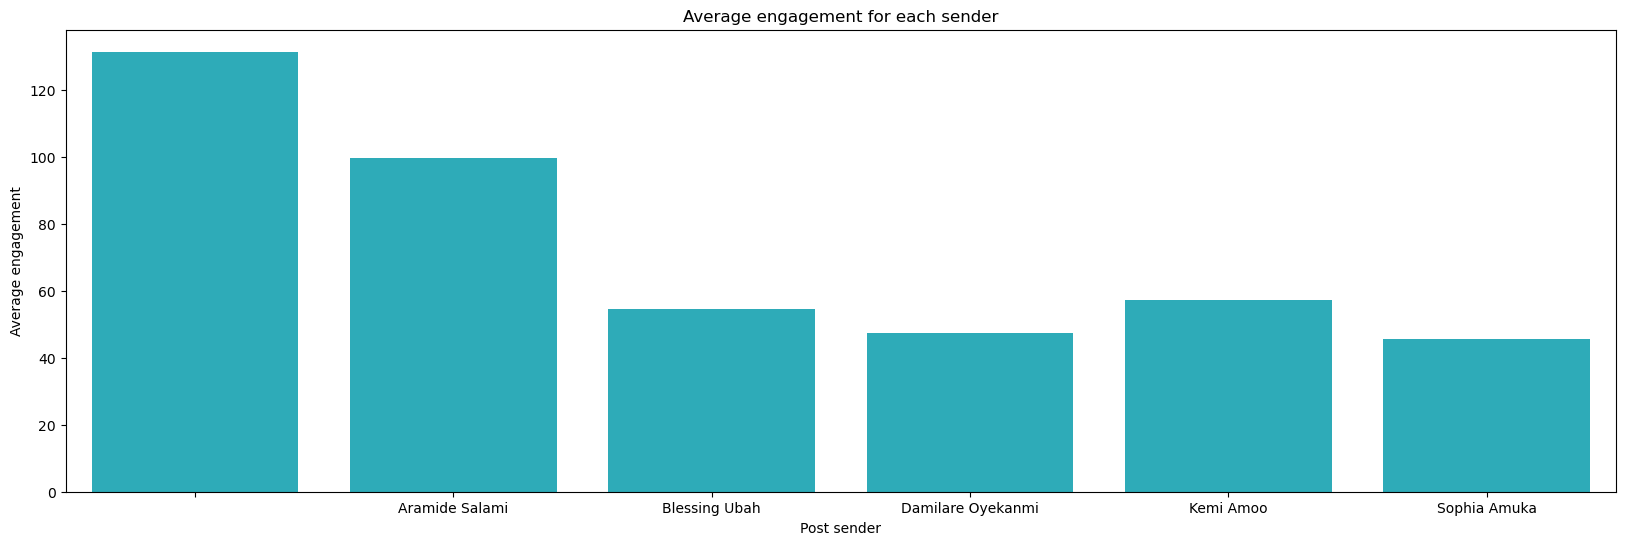

In [82]:
sender_engagement = instagram.groupby('Sent by').mean()['Engagements'].to_frame()
plot(sender_engagement.index, sender_engagement['Engagements'], sender_engagement, "Average engagement for each sender", 
     "Post sender", "Average engagement", type='bar')

**Aramide Salami** has the highest average engagement of all the senders by a lot (**99.74**). **Kemi Amoo** has the second highest average engagement (**57.29**).

--------------------------------------------------------------------------------------------------------------------------------

# Twitter

In [83]:
twitter.shape

(8529, 147)

In [84]:
twitter_columns = twitter.columns  # save column list

In [85]:
twitter_dropped_cols = []

# drop columns that are empty
for column in twitter_columns:
    if twitter[column].isna().sum() == twitter.shape[0]:  # if all the rows are empty
        twitter_dropped_cols.append(column)
        twitter.drop(columns=column, inplace=True)

In [86]:
twitter.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,bit.ly Link Clicks,Video Views,Media Views,Tags
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445,445,"345,718",3.6%,16,4,4,2.0,1,NaN,NaN,9,9,1,0.0,7,1.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,CIB Posts
1,7/12/2023 8:03 pm,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,"2,961","2,961","347,102",1.76%,52,11,11,20.0,3,NaN,NaN,18,18,NaN,1.0,12,5.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,7/12/2023 7:00 pm,1679189012798660608,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679189...,Sade was able to acquire a home loan and make ...,"https://bit.ly/StanbicIBTCHomeLoans, https://t...",850,850,"347,594",4.24%,36,4,4,1.0,3,0.82%,7.0,21,28,11,0.0,10,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,11,Weekly Wealth Posts


In [87]:
twitter.shape

(8529, 37)

## Data Cleaning

**Convert the date column to datetime datatype.**

In [88]:
am_pm = twitter['Date'].str.contains('am')

date_hold = pd.to_datetime(twitter['Date'].str.upper(), format="%m/%d/%Y %H:%M %p")

In [89]:
for idx, am in enumerate(am_pm):
    if not am and date_hold[idx].hour != 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)
    if am and date_hold[idx].hour == 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)

In [90]:
twitter['Date'] = date_hold

In [91]:
# Turn all numerical values columns to float to take care of NaNs that are making columns object datatype
for col in twitter.columns:
    if col == "Post ID":
        continue
    try:
        twitter[col] = twitter[col].str.replace(",", "")
        twitter[col] = twitter[col].astype("float")
    except:
        continue

In [92]:
# Divide the dataset into the four content types. Makes it easier to deal with
twitter_photo = twitter[twitter['Content Type'] == 'Photo']
twitter_video = twitter[twitter['Content Type'] == 'Video']
twitter_text = twitter[twitter['Content Type'] == 'Text']
twitter_link = twitter[twitter['Content Type'] == 'Link']

In [ ]:
twitter.to_csv("Twitter_cleaned.csv", index=False)

## Exploratory Data Analysis

### 1. What is the timeframe covered by the data?

In [93]:
twitter['Date'].min(), twitter['Date'].max()

(Timestamp('2013-02-17 09:01:00'), Timestamp('2023-07-13 10:57:00'))

A little over 10 years.

### 2. Which posts has the highest engagements?

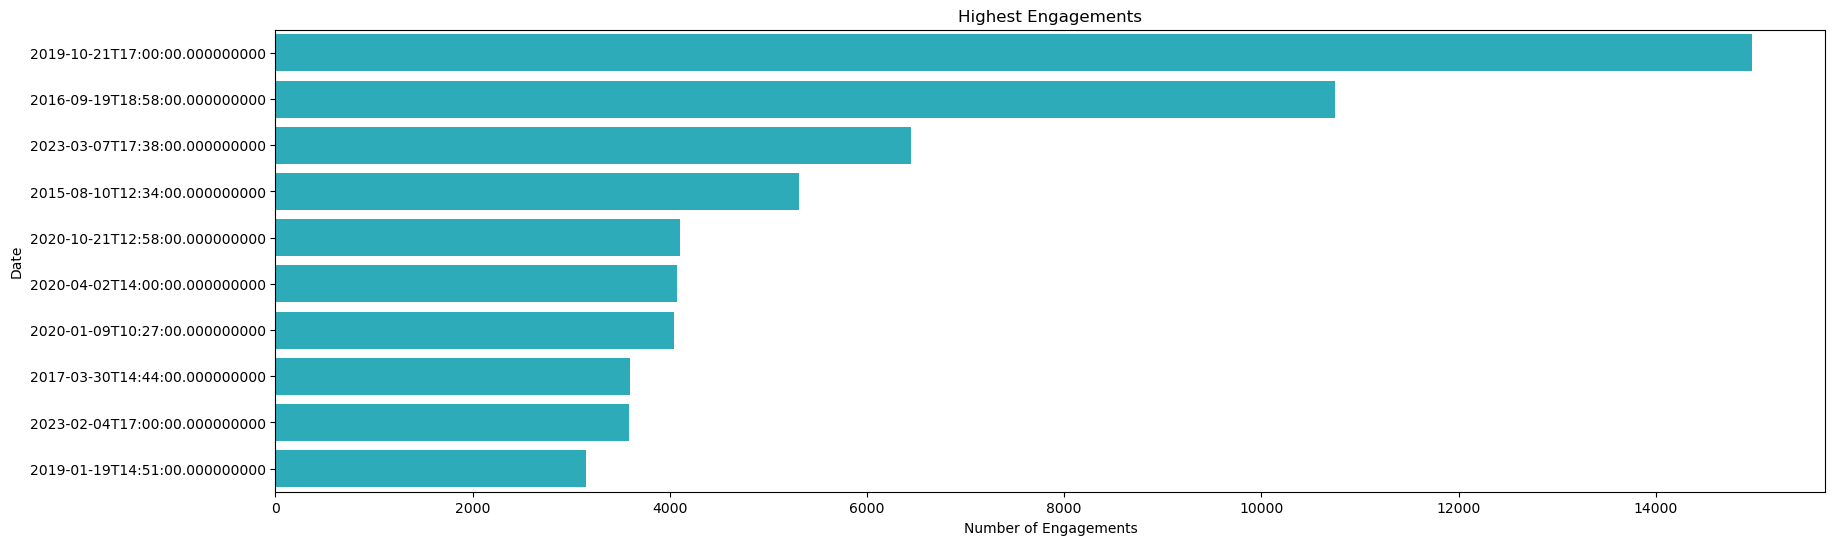

In [94]:
highest_engagements = twitter.sort_values(by='Engagements', ascending=False).head(10)
plot('Engagements', 'Date', highest_engagements, "Highest Engagements", "Number of Engagements", "Date", type='bar')

The first two posts are significantly higher than the rest. The highest engagement is from 2019 and the second highest is from 2016.

Both posts were about investments. Even though they were posted 3 years apart.

### 2.1. Which posts has the highest impressions?

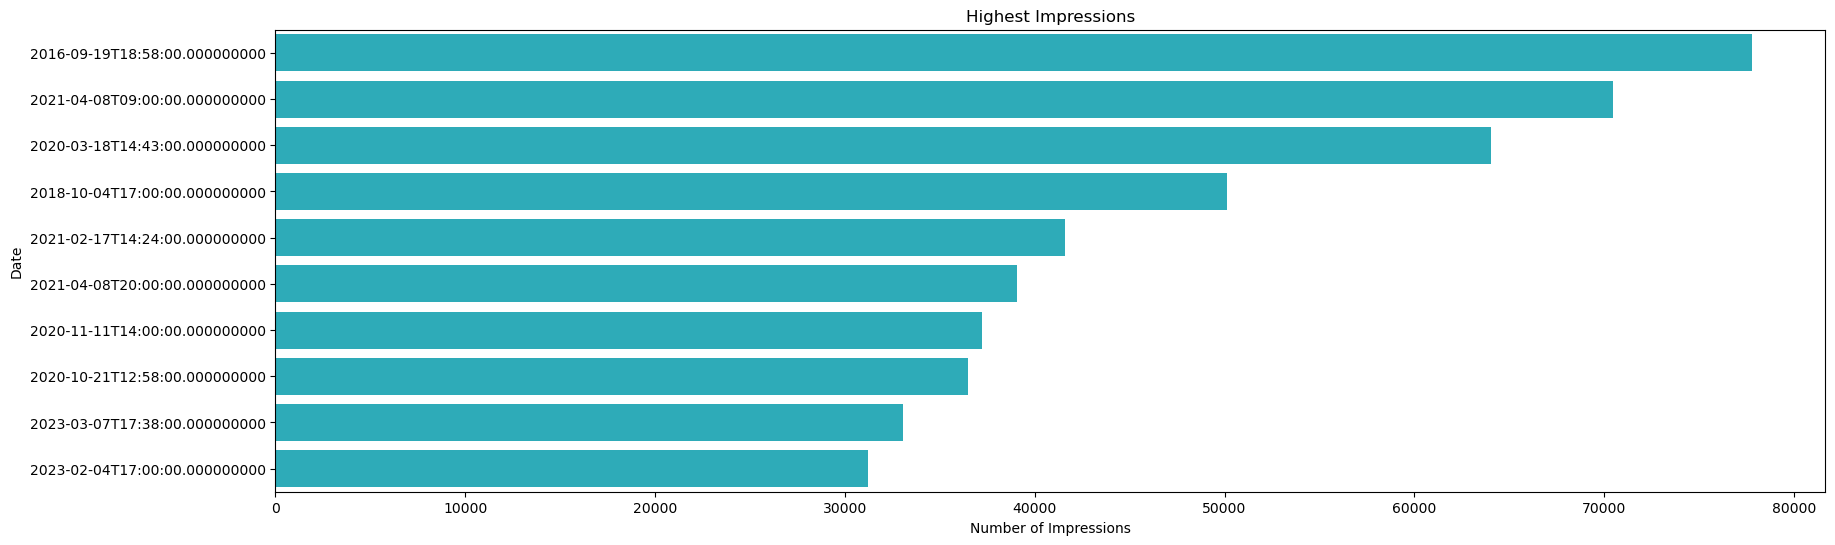

In [95]:
highest_impressions = twitter.sort_values(by='Impressions', ascending=False).head(10)
plot('Impressions', 'Date', highest_impressions, "Highest Impressions", "Number of Impressions", "Date", type='bar')

The same investment post from the engagement bar chart (the second highest bar) is top for impressions too.

### 4. Which types of posts (e.g., text, photos, videos) receive the most engagement?

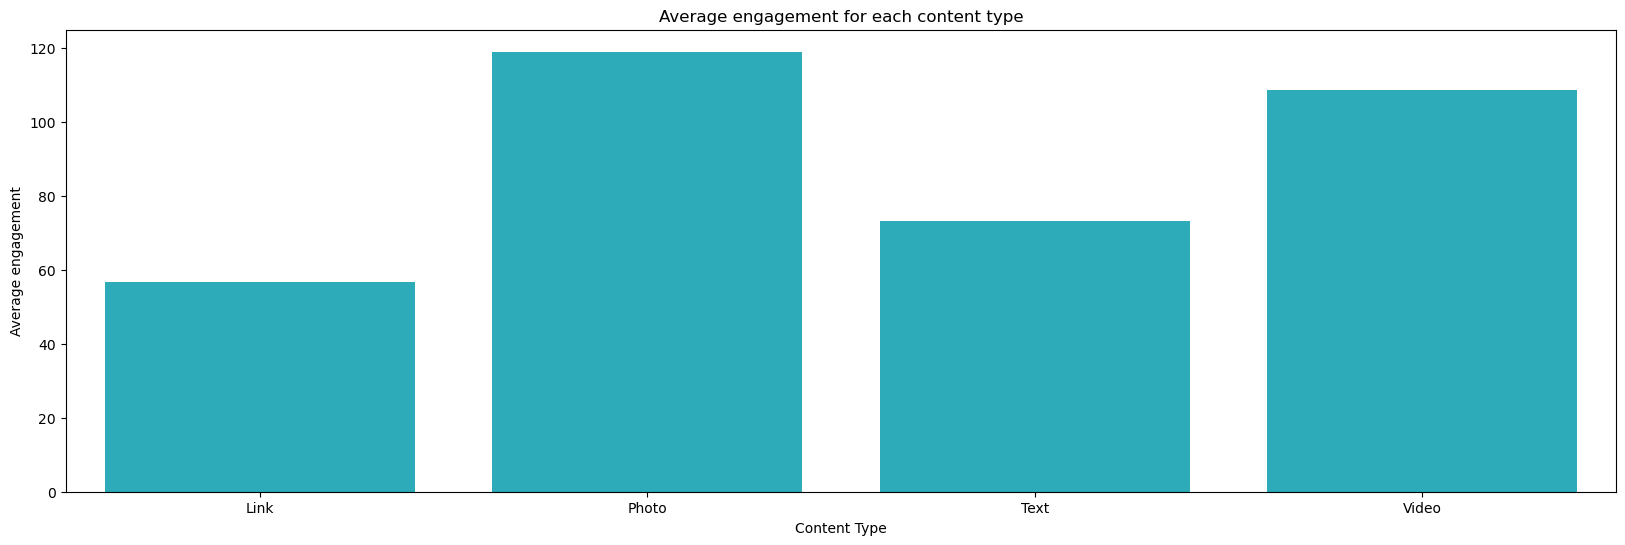

In [96]:
average_content = twitter.groupby('Content Type').mean()['Engagements'].to_frame()
plot(average_content.index, average_content['Engagements'], average_content, "Average engagement for each content type", 
     "Content Type", "Average engagement", type='bar')

On average, Photos get the most engagement. Videos get the next highest number of engagements.

### 4.1. Which types of posts (e.g., text, photos, videos) receive the most impressions?

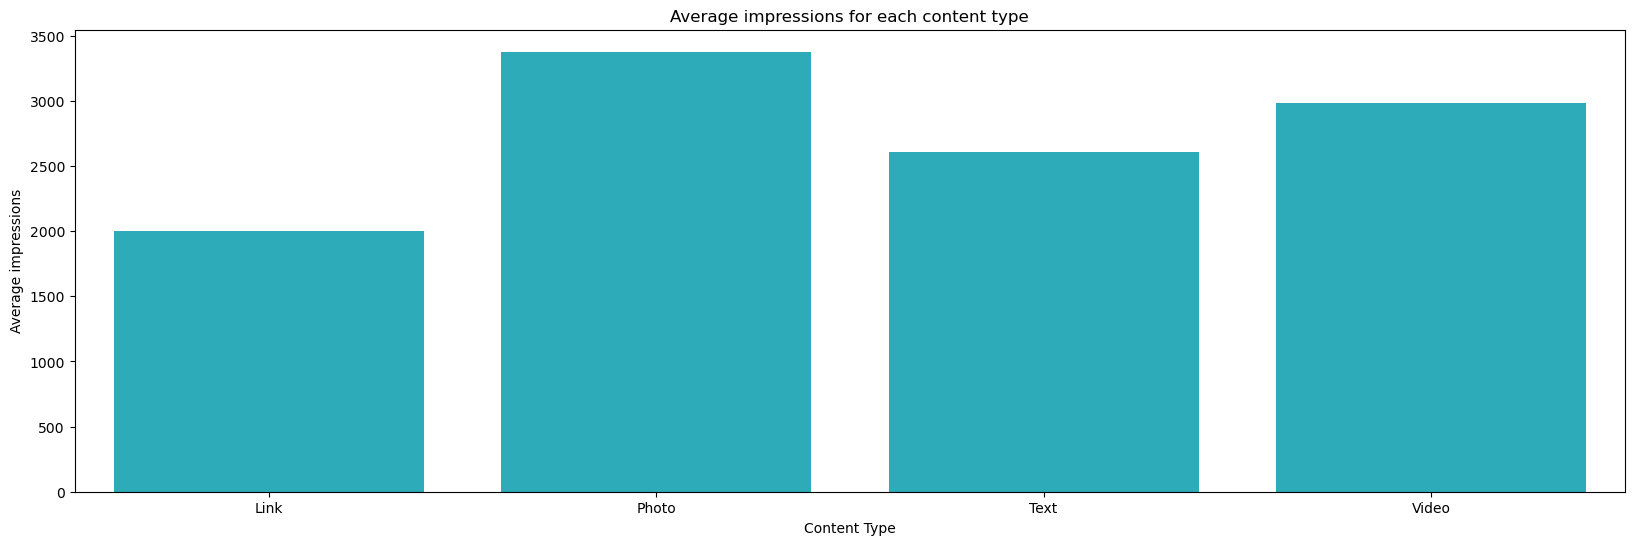

In [97]:
average_content = twitter.groupby('Content Type').mean()['Impressions'].to_frame()
plot(average_content.index, average_content['Impressions'], average_content, "Average impressions for each content type", 
     "Content Type", "Average impressions", type='bar')

Same as for engagements, Photos get the most impressions. Videos get the next highest number of impressions.

### 5. How does engagement vary between weekdays and weekends or morning and evening? What are the peak times for user engagement?

In [98]:
# Saturday and Sunday is denoted by 5 and 6 respectively
weekends = twitter[twitter['Date'].dt.dayofweek > 4]
weekdays = twitter[twitter['Date'].dt.dayofweek < 5]

In [99]:
weekends.Engagements.mean(), weekdays.Engagements.mean()

(109.25958702064896, 110.29819424109321)

In [100]:
weekends.Impressions.mean(), weekdays.Impressions.mean()

(3119.0979351032447, 3207.862371888726)

The average number of Impressions and Engagements are higher on weekdays, although the difference is not that significant.

In [101]:
morning = weekdays[weekdays['Date'].dt.hour < 12]
evening = weekdays[weekdays['Date'].dt.hour >= 12]

In [102]:
morning.Engagements.mean(), evening.Engagements.mean()

(89.8759053597296, 120.6746810598626)

In [103]:
morning.Impressions.mean(), evening.Impressions.mean()

(3034.581844519556, 3295.905544651619)

In [104]:
morning = weekends[weekends['Date'].dt.hour < 12]
evening = weekends[weekends['Date'].dt.hour >= 12]

In [105]:
morning.Engagements.mean(), evening.Engagements.mean()

(91.95862068965518, 122.19072164948453)

In [106]:
morning.Impressions.mean(), evening.Impressions.mean()

(2733.5848275862068, 3407.239175257732)

The average number of Impressions and Engagements are higher in the evenings, whether it's weekday or weekend.

We can say that people typically use twitter in the evenings.

### 6. Does the number of shares affect the engagements on a post?

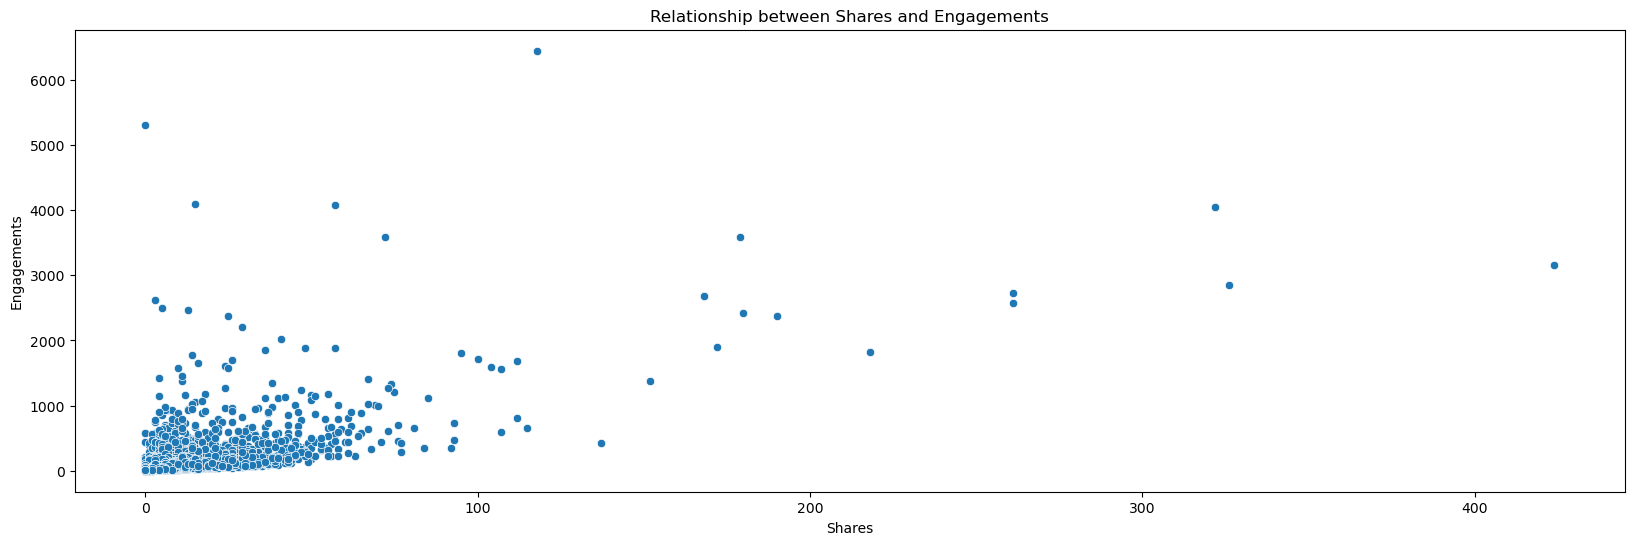

In [107]:
# Remove outliers to show trend more clearly
shares_vs_engagements = twitter[(twitter['Engagements'] < 7500) & (twitter['Shares'] < 800)]
plot('Shares', 'Engagements', shares_vs_engagements, "Relationship between Shares and Engagements", "Shares", "Engagements", type='scatter')

There is a strong positive correlation between the number of shares (Retweets and Quote tweets) of a post and its engagement. The pearson correlation value is **0.79**.

### 7. Do posts with tags perform better in terms of engagement and impressions?

In [108]:
tags = twitter['Tags'].dropna().unique()  # Get the tags 
twitter_tags = twitter[twitter['Tags'].isin(tags)]  # Filter the posts that have tags
twitter_tags.Engagements.mean(), twitter_tags.Impressions.mean()

(67.83189033189034, 1870.6659451659452)

In [109]:
tags = twitter['Tags'].dropna().unique()
twitter_no_tags = twitter[~twitter['Tags'].isin(tags)]  # Filter the posts that do not have tags
twitter_no_tags.Engagements.mean(), twitter_no_tags.Impressions.mean()

(119.14234820322181, 3471.6322800495664)

Posts that do not have Tags perform significantly better in terms of Engagement and Impressions. Perhaps the Twitter algorithm does not like Tags on a post.

### 8. Are engagements affected by who sends the post?

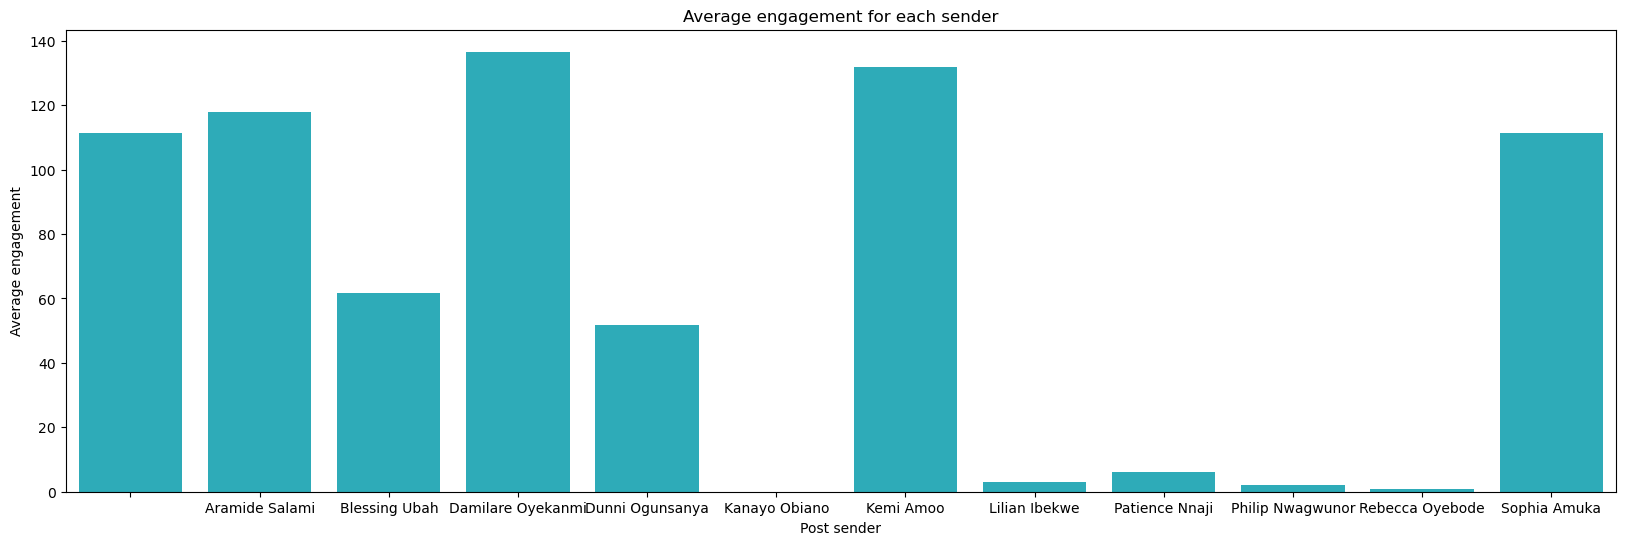

In [110]:
sender_engagement = twitter.groupby('Sent by').mean()['Engagements'].to_frame()
plot(sender_engagement.index, sender_engagement['Engagements'], sender_engagement, "Average engagement for each sender", 
     "Post sender", "Average engagement", type='bar')

**Damilare Oyekanmi** has the highest average engagement of all the senders (**136.6**). **Kemi Amoo** has the second highest average engagement (**131.7**).

Some people have really low average engagements too.

--------------------------------------------------------------------------------------------------------------------------------

# LinkedIn

In [111]:
linkedin.shape

(7760, 147)

In [112]:
linkedin_columns = linkedin.columns  # save column list

In [113]:
linkedin_dropped_cols = []

# drop columns that are empty
for column in linkedin_columns:
    if linkedin[column].isna().sum() == linkedin.shape[0]:  # if all the rows are empty
        linkedin_dropped_cols.append(column)
        linkedin.drop(columns=column, inplace=True)

In [114]:
linkedin.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608456704,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,7/12/2023 8:00 pm,7084969706025009152,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/12/2023 7:00 pm,7084954641788018688,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPos...,Sade was able to acquire a home loan and make ...,NaN,63,63,9.52%,6,3.0,3.0,0.0,0.0,4.76%,3,3,NaN,NaN,NaN,Weekly Wealth Posts


In [115]:
linkedin.shape

(7760, 25)

## Data Cleaning

**Convert the date column to datetime datatype.**

In [116]:
am_pm = linkedin['Date'].str.contains('am')

date_hold = pd.to_datetime(linkedin['Date'].str.upper(), format="%m/%d/%Y %H:%M %p")

In [117]:
for idx, am in enumerate(am_pm):
    if not am and date_hold[idx].hour != 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)
    if am and date_hold[idx].hour == 12:
        date_hold[idx] = date_hold[idx] + dt.timedelta(hours=12)

In [118]:
linkedin['Date'] = date_hold

In [119]:
linkedin.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Poll Votes,Tags
0,2023-07-13 12:03:00,7085212016608456704,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-07-12 20:00:00,7084969706025009152,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-07-12 19:00:00,7084954641788018688,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPos...,Sade was able to acquire a home loan and make ...,NaN,63,63,9.52%,6,3.0,3.0,0.0,0.0,4.76%,3,3,NaN,NaN,NaN,Weekly Wealth Posts
3,2023-07-11 14:49:00,7084529022105231360,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Safeguard every aspect of your operations with...,NaN,164,164,1.83%,3,1.0,1.0,0.0,0.0,1.22%,2,2,NaN,NaN,NaN,Weekly Wealth Posts
4,2023-07-11 09:17:00,7084445462967070721,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"Together, we can make a difference and build a...",NaN,376,376,5.05%,19,11.0,11.0,0.0,0.0,2.13%,8,8,NaN,NaN,NaN,NaN


In [120]:
# Turn all numerical values columns to float to take care of NaNs that are making columns object datatype
for col in linkedin.columns:
    if col == "Post ID":
        continue
    try:
        linkedin[col] = linkedin[col].str.replace(",", "")
        linkedin[col] = linkedin[col].astype("float")
    except:
        continue

In [121]:
# Divide the dataset into the four content types. Makes it easier to deal with
linkedin_photo = linkedin[linkedin['Content Type'] == 'Photo']
linkedin_video = linkedin[linkedin['Content Type'] == 'Video']
linkedin_text = linkedin[linkedin['Content Type'] == 'Text']
linkedin_link = linkedin[linkedin['Content Type'] == 'Link']
linkedin_poll = linkedin[linkedin['Content Type'] == 'Poll']
linkedin_document = linkedin[linkedin['Content Type'] == 'Document']

In [ ]:
linkedin.to_csv("LinkedIn_cleaned.csv", index=False)

## Exploratory Data Analysis

In [122]:
linkedin.sample()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Poll Votes,Tags
3324,2021-03-31 18:04:00,6783071519066095616,LinkedIn,Post,Video,Stanbic IBTC,,https://linkedin.com/feed/update/urn:li:ugcPos...,“The matter of gender equality is contributory...,NaN,827.0,827.0,2.3%,19.0,10.0,10.0,2.0,0.0,0.85%,7.0,7.0,132.0,132.0,NaN,NaN


### 1. What is the timeframe covered by the data?

In [123]:
linkedin['Date'].min(), linkedin['Date'].max()

(Timestamp('2014-05-05 10:57:00'), Timestamp('2023-07-13 12:03:00'))

Approximately 9 years.

### 2. What posts had the highest engagements?

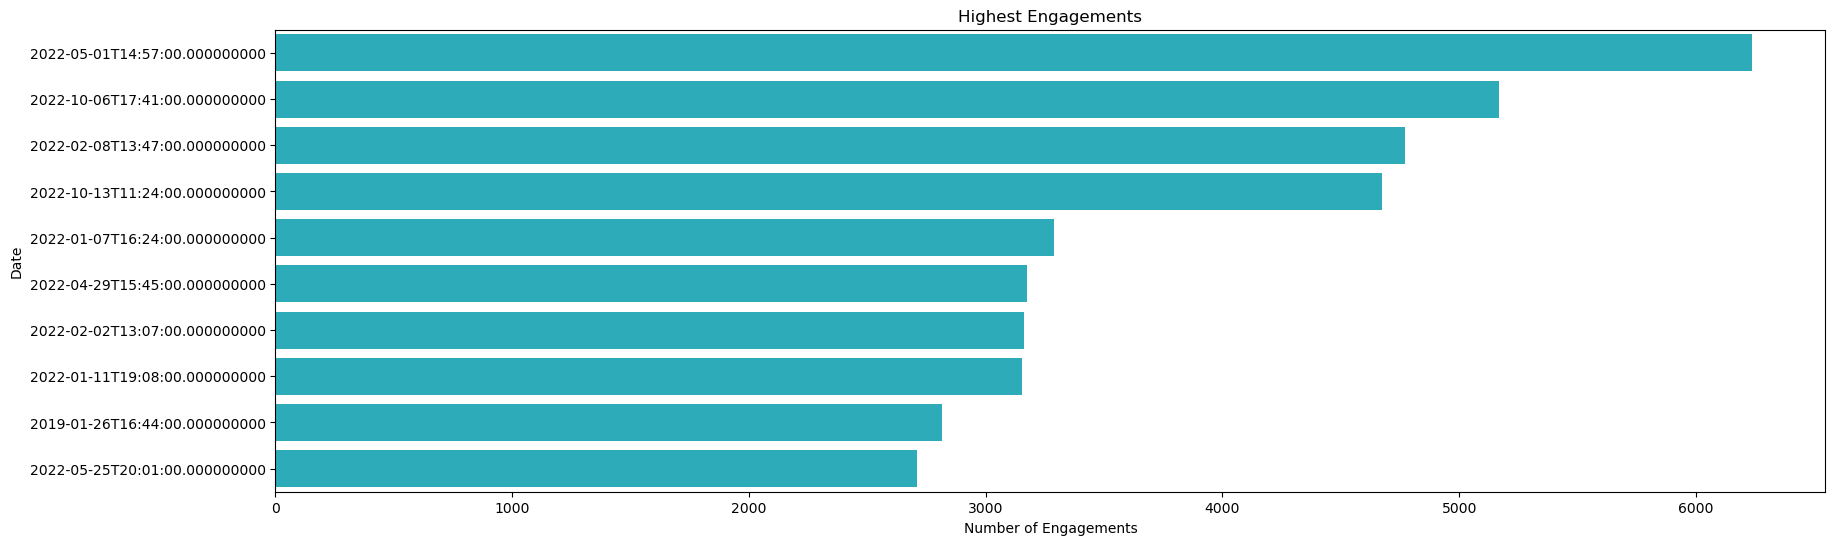

In [124]:
highest_engagements = linkedin.sort_values(by='Engagements', ascending=False).head(10)
plot('Engagements', 'Date', highest_engagements, "Highest Engagements", "Number of Engagements", "Date", type='bar')

Most of the posts in the top 10 are from 2022, there's just one post from 2019.

Posts from recent years are getting the most engagements.

### 2.1. What posts had the highest impressions?

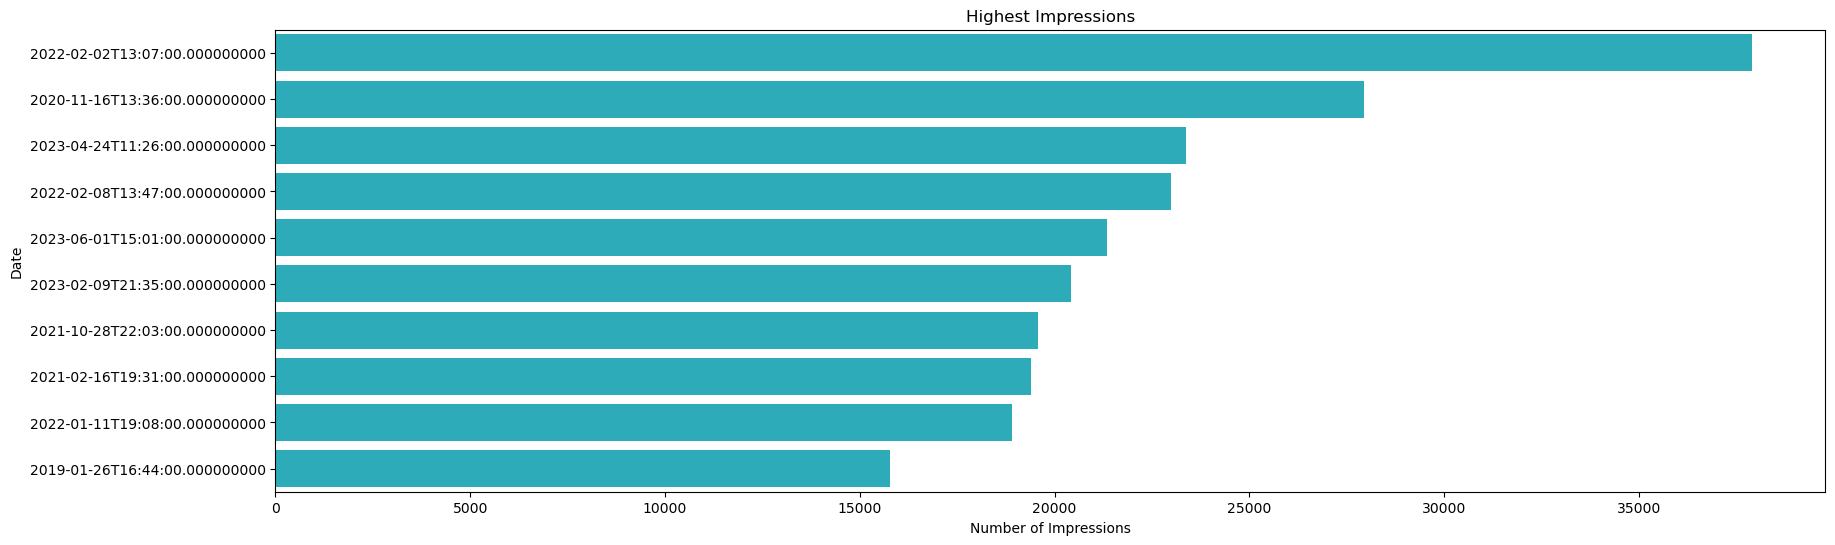

In [125]:
highest_impressions = linkedin.sort_values(by='Impressions', ascending=False).head(10)
plot('Impressions', 'Date', highest_impressions, "Highest Impressions", "Number of Impressions", "Date", type='bar')

There is no data on the post that had the highest engagement. Perhaps it was a repost?

### 3. How does engagement vary between weekdays and weekends or morning and evening? What are the peak times for user engagement?


In [126]:
# Saturday and Sunday is denoted by 5 and 6 respectively
weekends = linkedin[linkedin['Date'].dt.dayofweek > 4]
weekdays = linkedin[linkedin['Date'].dt.dayofweek < 5]

In [127]:
weekends.Engagements.mean(), weekdays.Engagements.mean()

(49.64719626168224, 50.64857369255151)

In [128]:
weekends.Impressions.mean(), weekdays.Impressions.mean()

(1088.7609034267912, 1081.9156101426308)

The average Impressions and Engagements on posts are really similar. There is almost no difference posting on weekdays or weekends.

In [129]:
morning = weekdays[weekdays['Date'].dt.hour < 12]
evening = weekdays[weekdays['Date'].dt.hour >= 12]

In [130]:
morning.Engagements.mean(), evening.Engagements.mean()

(42.59520807061791, 54.33795493934142)

In [131]:
morning.Impressions.mean(), evening.Impressions.mean()

(1052.6109709962168, 1095.340554592721)

In [132]:
morning = weekends[weekends['Date'].dt.hour < 12]
evening = weekends[weekends['Date'].dt.hour >= 12]

In [133]:
morning.Engagements.mean(), evening.Engagements.mean()

(41.0945179584121, 55.63973509933775)

In [134]:
morning.Impressions.mean(), evening.Impressions.mean()

(1050.6502835538752, 1115.4635761589404)

The average number of Impressions and Engagements are higher in the evenings, whether it's weekday or weekend.

We can say that people typically use linkedIn in the evenings.

### 4. Do posts with tags perform better in terms of engagement and impressions?

In [135]:
tags = linkedin['Tags'].dropna().unique()  # Get the tags 
linkedin_tags = linkedin[linkedin['Tags'].isin(tags)]  # Filter the posts that have tags
linkedin_tags.Engagements.mean(), linkedin_tags.Impressions.mean()

(42.99560853199498, 826.7314930991217)

In [136]:
tags = linkedin['Tags'].dropna().unique()
linkedin_no_tags = linkedin[~linkedin['Tags'].isin(tags)]  # Filter the posts that do not have tags
linkedin_no_tags.Engagements.mean(), linkedin_no_tags.Impressions.mean()

(52.95187842971718, 1169.6219924018574)


Posts that do not have Tags perform significantly better in terms of `Engagement` and `Impressions`. Perhaps the LinkedIn algorithm does not like Tags on a post.

### 5. Are engagements affected by who sends the post?

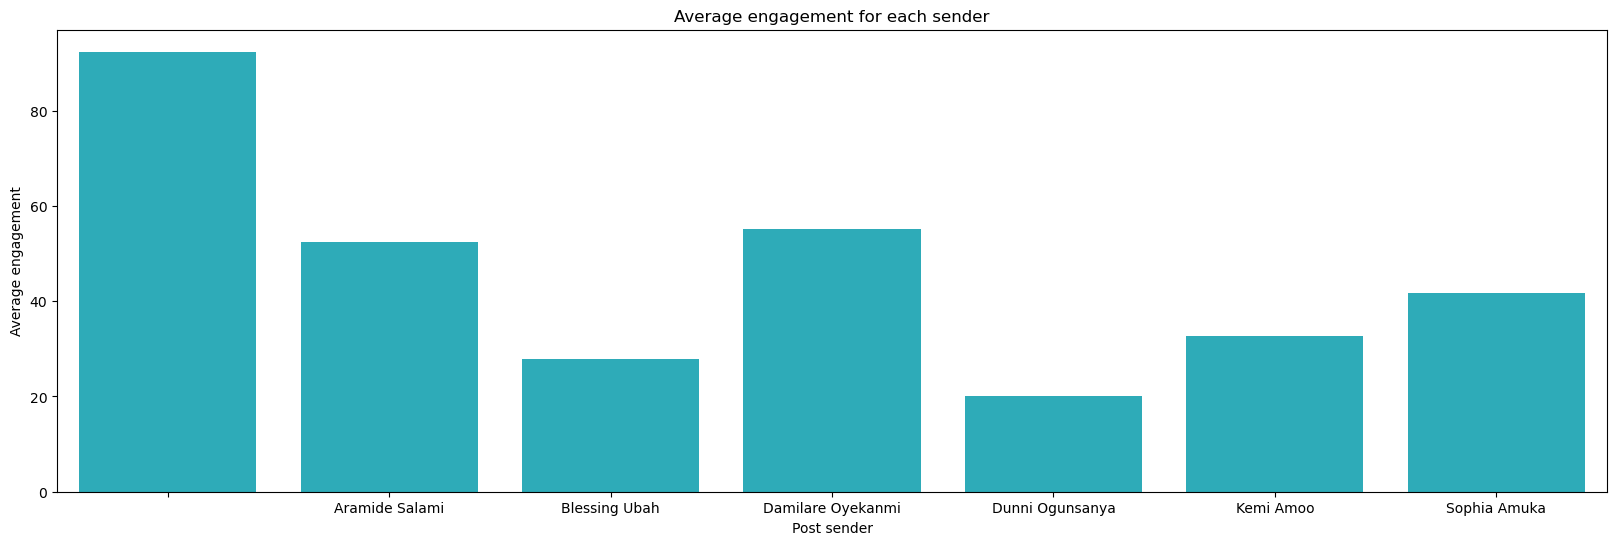

In [137]:
sender_engagement = linkedin.groupby('Sent by').mean()['Engagements'].to_frame()
plot(sender_engagement.index, sender_engagement['Engagements'], sender_engagement, "Average engagement for each sender", 
     "Post sender", "Average engagement", type='bar')

**Damilare Oyekanmi** has the highest average engagement of all the senders (**55.2**). **Aramide Salami** has the second highest average engagement (**52.5**).

--------------------------------------------------------------------------------------------------------------------------------

# RECOMMENDATIONS

1.	On weekdays, Facebook posts should be made mostly in the evenings, and on weekends, posts should be made in the mornings. This is when Engagement is highest.

2.	More Facebook posts should be Texts, as this content type receives more engagement, impression and unique clicks than Photos and Videos.

3.	Facebook posts that are videos should be as short as possible, ideally under 10 seconds because for videos more than 10 seconds in length, only 15% of people watch the whole video. This number goes up to 56% for videos that are 10 seconds or less in length.

4.	Texts should be added to Facebook videos because 37.5% of viewers watch the videos with the sound off.

5.	Aramide Salami and Sophia Amuka should be in charge of sending out Facebook posts. They have the highest engagements on posts.

6.	On weekdays, Instagram posts should be made mostly in the mornings, and on weekends, posts should be made in the evenings. This is when Engagement is highest.

7.	More Instagram posts should be Videos, as this content type receives more engagement, and impression than Photos and Videos.

8.	Aramide Salami and Kemi Amoo should be in charge of sending out Instagram posts. They have the highest engagements on posts.

9.	Twitter posts should be made mostly in the evenings, whether it’s weekday or weekend. This is when Engagement is highest.

10.	Photos and Videos content type perform better than texts, so they should be tweeted more.

11.	Damilare Oyekanmi and Kemi Amoo should be in charge of sending out Twitter posts. They have the highest engagements on posts.

12.	LinkedIn posts should be made mostly in the evenings, whether it’s weekday or weekend. This is when Engagement is highest.

13.	Damilare Oyekanmi and Aramide Salami should be in charge of sending out LinkedIn posts. They have the highest engagements on posts.


--------------------------------------------------------------------------------------------------------------------------------